EDA

1. Create dummy variable for categorical ft. 
2. Pairplot of Total Gross vs. Numerical Features 
3. Heatmap on Correlations for Numerical Features
4. Histogram of Total Gross vs Budget 

5. Linear Regression Model for Numerical (opening is excluded-- not known variable for prediction) 
6. Investigate Categorical Fts 
7. CV/test 
8. More Ft Engineering 

In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import patsy
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
#read movie data that is cleaned 

df = pd.read_csv('CLEANED_DATASET.csv')
df.head()

,title,year,domestic_gross,foreign_gross,total_gross,budget,opening,distributor,mpaa,runtime,genre,director,star
0,Transformers: Revenge of the Fallen,2009,402111870,434191823,836303693,200000000,108966307,DreamWorks,PG-13,149,Action,Michael Bay,other_star
1,Up,2009,293004164,442094918,735099082,175000000,68108790,Walt Disney Studios Motion Pictures,PG,96,Adventure,other_director,other_star
2,The Twilight Saga: New Moon,2009,296623634,413203828,709827462,50000000,142839137,Summit Entertainment,PG-13,130,Adventure,other_director,other_star
3,Avatar,2009,749766139,1993811448,2743577587,237000000,77025481,Twentieth Century Fox,PG-13,162,Action,other_director,other_star
4,The Hangover,2009,277322503,191490290,468812793,35000000,44979319,Warner Bros.,R,100,Comedy,Todd Phillips,other_star


In [3]:
df.describe()

,year,domestic_gross,foreign_gross,total_gross,budget,opening,runtime
count,1339.000000,1.339000e+03,1.339000e+03,1.339000e+03,1.339000e+03,1.339000e+03,1339.000000
mean,2013.798357,7.651002e+07,1.143410e+08,1.908510e+08,5.529657e+07,2.276762e+07,110.498880
std,3.194441,9.456373e+07,1.843847e+08,2.703579e+08,5.553796e+07,3.101837e+07,17.036599
min,2008.000000,1.755212e+06,0.000000e+00,1.755212e+06,1.000000e+05,2.284900e+04,63.000000
25%,2011.000000,2.090714e+07,1.491232e+07,4.012326e+07,1.800000e+07,5.437976e+06,98.000000
50%,2014.000000,4.502028e+07,4.510000e+07,9.328260e+07,3.500000e+07,1.357517e+07,108.000000
75%,2017.000000,9.386301e+07,1.257753e+08,2.194774e+08,7.400000e+07,2.732752e+07,120.000000
max,2019.000000,8.583730e+08,1.993811e+09,2.797501e+09,3.560000e+08,3.571150e+08,181.000000


In [4]:
df.shape

(1339, 13)

In [5]:
df[df['star'] == '0']

,title,year,domestic_gross,foreign_gross,total_gross,budget,opening,distributor,mpaa,runtime,genre,director,star


In [6]:
df[df['star'] == '0']

,title,year,domestic_gross,foreign_gross,total_gross,budget,opening,distributor,mpaa,runtime,genre,director,star


In [7]:
df.shape

(1339, 13)

In [8]:
#create dummy for genre, mpaa, director and star <--- to add later for ft engineering 

In [9]:
feature_df = pd.get_dummies(df,columns=['genre', 'mpaa', 'director', 'star'], drop_first=True)


In [10]:
feature_df

,title,year,domestic_gross,foreign_gross,total_gross,budget,opening,distributor,runtime,genre_Adventure,...,director_Woody Allen,director_other_director,star_Denzel Washington,star_Dwayne Johnson,star_Mark Wahlberg,star_Matt Damon,star_Robert Downey Jr.,star_Steve Carell,star_Tom Hanks,star_other_star
0,Transformers: Revenge of the Fallen,2009,402111870,434191823,836303693,200000000,108966307,DreamWorks,149,0,...,0,0,0,0,0,0,0,0,0,1
1,Up,2009,293004164,442094918,735099082,175000000,68108790,Walt Disney Studios Motion Pictures,96,1,...,0,1,0,0,0,0,0,0,0,1
2,The Twilight Saga: New Moon,2009,296623634,413203828,709827462,50000000,142839137,Summit Entertainment,130,1,...,0,1,0,0,0,0,0,0,0,1
3,Avatar,2009,749766139,1993811448,2743577587,237000000,77025481,Twentieth Century Fox,162,0,...,0,1,0,0,0,0,0,0,0,1
4,The Hangover,2009,277322503,191490290,468812793,35000000,44979319,Warner Bros.,100,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Stan & Ollie,2018,5470235,18950688,24420923,10000000,78104,Sony Pictures Classics,98,0,...,0,1,0,0,0,0,0,0,0,1
1335,The Goldfinch,2019,5332621,4600000,9932621,45000000,2679027,Warner Bros.,149,0,...,0,1,0,0,0,0,0,0,0,1
1336,Don't Let Go,2019,5215062,72949,5288011,5000000,2338669,OTL Releasing,103,0,...,0,1,0,0,0,0,0,0,0,1
1337,Tolkien,2019,4535154,4554886,9090040,20000000,2200537,Fox Searchlight Pictures,112,0,...,0,1,0,0,0,0,0,0,0,1


In [11]:
feature_df.columns

Index(['title', 'year', 'domestic_gross', 'foreign_gross', 'total_gross',
       'budget', 'opening', 'distributor', 'runtime', 'genre_Adventure',
       'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime',
       'genre_Drama', 'genre_Fantasy', 'genre_Horror', 'genre_Thriller',
       'genre_other_genre', 'mpaa_Not Rated', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R', 'director_Michael Bay', 'director_Ridley Scott',
       'director_Ron Howard', 'director_Shawn Levy',
       'director_Steven Soderbergh', 'director_Steven Spielberg',
       'director_Tim Burton', 'director_Todd Phillips', 'director_Woody Allen',
       'director_other_director', 'star_Denzel Washington',
       'star_Dwayne Johnson', 'star_Mark Wahlberg', 'star_Matt Damon',
       'star_Robert Downey Jr.', 'star_Steve Carell', 'star_Tom Hanks',
       'star_other_star'],
      dtype='object')

In [12]:
feature_df.rename(columns = {'genre_Adventure': 'adventure',
                             'genre_Animation': 'animation',
                             'genre_Biography': 'biography', 
                             'genre_Comedy': 'comedy', 
                            'genre_Crime': 'crime', 
                             'genre_Drama': 'drama', 
                             'genre_Fantasy':'fantasy', 
                            'genre_Horror': 'horror',
                             'genre_Thriller':'thriller',
                            'genre_other_genre': 'other_genre', 
                            'mpaa_Not Rated': 'not_rated', 
                            'mpaa_PG': 'PG', 
                            'mpaa_PG-13':'PG-13', 
                            'mpaa_R': 'R'}, inplace = True)

In [13]:
feature_df.columns

Index(['title', 'year', 'domestic_gross', 'foreign_gross', 'total_gross',
       'budget', 'opening', 'distributor', 'runtime', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'drama', 'fantasy', 'horror',
       'thriller', 'other_genre', 'not_rated', 'PG', 'PG-13', 'R',
       'director_Michael Bay', 'director_Ridley Scott', 'director_Ron Howard',
       'director_Shawn Levy', 'director_Steven Soderbergh',
       'director_Steven Spielberg', 'director_Tim Burton',
       'director_Todd Phillips', 'director_Woody Allen',
       'director_other_director', 'star_Denzel Washington',
       'star_Dwayne Johnson', 'star_Mark Wahlberg', 'star_Matt Damon',
       'star_Robert Downey Jr.', 'star_Steve Carell', 'star_Tom Hanks',
       'star_other_star'],
      dtype='object')

In [14]:
#save categorical ft csv

feature_df.to_csv('cleaned_dummy.csv', index = False)

In [15]:
#load categorical ft df to use for analysis 

df_final= pd.read_csv('cleaned_dummy.csv')

In [16]:
df_final.head()

,title,year,domestic_gross,foreign_gross,total_gross,budget,opening,distributor,runtime,adventure,...,director_Woody Allen,director_other_director,star_Denzel Washington,star_Dwayne Johnson,star_Mark Wahlberg,star_Matt Damon,star_Robert Downey Jr.,star_Steve Carell,star_Tom Hanks,star_other_star
0,Transformers: Revenge of the Fallen,2009,402111870,434191823,836303693,200000000,108966307,DreamWorks,149,0,...,0,0,0,0,0,0,0,0,0,1
1,Up,2009,293004164,442094918,735099082,175000000,68108790,Walt Disney Studios Motion Pictures,96,1,...,0,1,0,0,0,0,0,0,0,1
2,The Twilight Saga: New Moon,2009,296623634,413203828,709827462,50000000,142839137,Summit Entertainment,130,1,...,0,1,0,0,0,0,0,0,0,1
3,Avatar,2009,749766139,1993811448,2743577587,237000000,77025481,Twentieth Century Fox,162,0,...,0,1,0,0,0,0,0,0,0,1
4,The Hangover,2009,277322503,191490290,468812793,35000000,44979319,Warner Bros.,100,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df_final.shape

(1339, 41)

In [18]:
df_final.total_gross.min()

1755212

1. Histogram of Distribution of Total Gross 

Text(0, 0.5, 'Number of Movies')

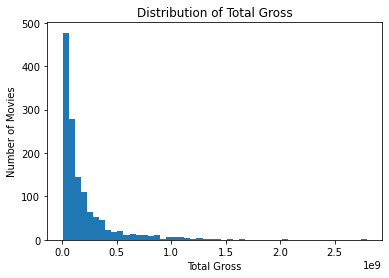

In [19]:
plt.hist(df_final.total_gross, bins = 50)
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Number of Movies')

#plt.savefig('Distribution of total_gross.png', dpi=200)

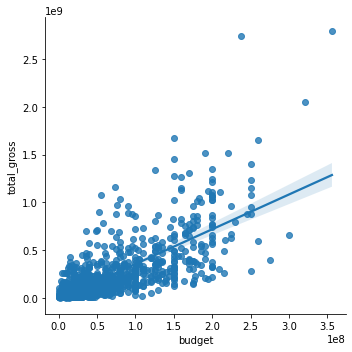

In [20]:
sns.lmplot(x='budget', y= 'total_gross', data = df_final)

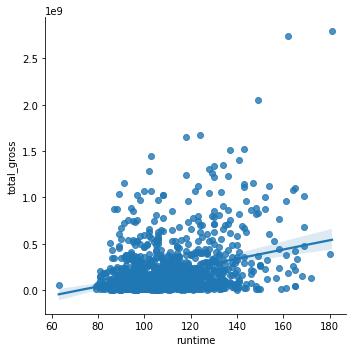

In [21]:
sns.lmplot(x='runtime', y= 'total_gross', data = df_final)

In [22]:
#drop non numerical ft to analyze just numerical ft 
#drop foreign gross and domestic gross bc it is the summation of total gross

df_num = df_final[['title','year','total_gross', 'budget', 'runtime']]

print(type(df_num))

<class 'pandas.core.frame.DataFrame'>


In [23]:
df_num.head()

,title,year,total_gross,budget,runtime
0,Transformers: Revenge of the Fallen,2009,836303693,200000000,149
1,Up,2009,735099082,175000000,96
2,The Twilight Saga: New Moon,2009,709827462,50000000,130
3,Avatar,2009,2743577587,237000000,162
4,The Hangover,2009,468812793,35000000,100


2. pairplot for numerical features

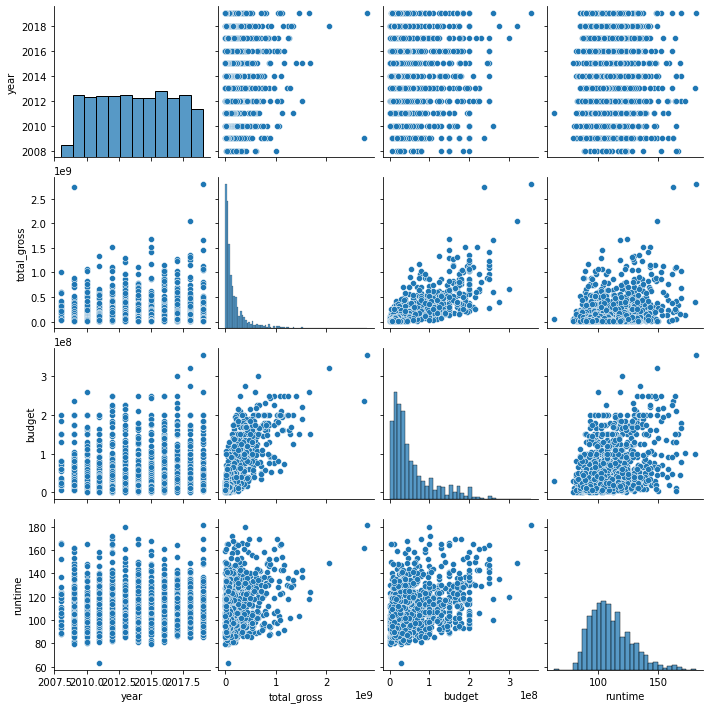

In [24]:
sns.pairplot(df_num)

3. Heatmap to see correlation of numerical features

In [25]:
#get correlations with total gross 
df_num.corr()['total_gross'].sort_values(ascending = False)

total_gross    1.000000
budget         0.748554
runtime        0.314283
year           0.064674
Name: total_gross, dtype: float64

<AxesSubplot:>

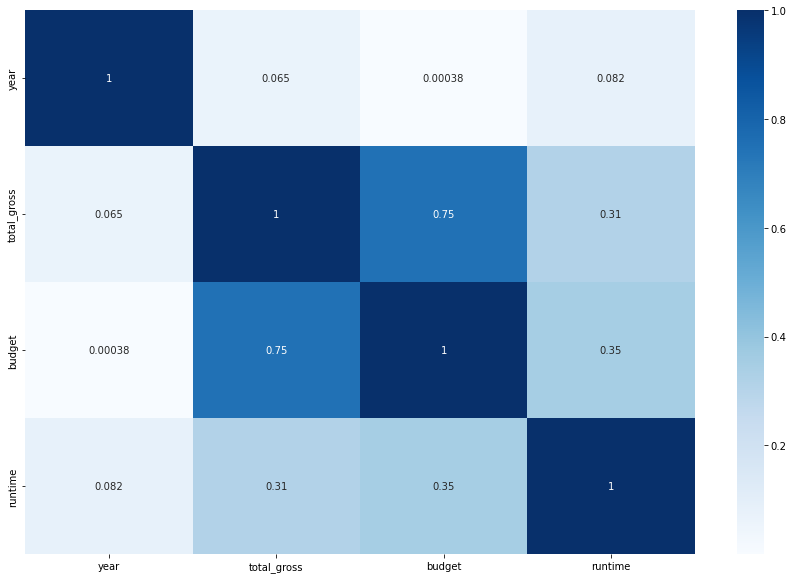

In [26]:
plt.figure(figsize = [15,10])
sns.heatmap(df_num.corr(), cmap = 'Blues', annot = True)
#plt.savefig('Heatmap_numerical_ft.png', dpi=200)

In [27]:
#baseline model for numerical ft only -- 

In [28]:
df_num.dtypes

title          object
year            int64
total_gross     int64
budget          int64
runtime         int64
dtype: object

In [29]:
#OLS summary for baseline numerical values 

X = df_num.drop(columns =['total_gross', 'title'], axis = 1)
X = sm.add_constant(X)
y = df_num['total_gross']
mod_1 = sm.OLS(y, X, data = df_num)

fit_1 = mod_1.fit()
fit_1.summary()

/Users/hannahkim/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     582.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.34e-242
Time:                        16:17:33   Log-Likelihood:                -27336.
No. Observations:                1339   AIC:                         5.468e+04
Df Residuals:                    1335   BIC:                         5.470e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.032e+10   3.08e+09     -3.351      0.001   -1.64e+10   -4.28e+09
year        5.072e+06   1.53e+06      3.315      0.001    2.07e+06    8.07e+06
budget         3.5508      0.094     37.940      0.000       3.367       3.734
runtime     8.686e+05   3.06e+05      2.837      0.005    2.68e+05    1.47e+06
==============================================================================
Omnibus:                      849.575   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19297.462
Skew:                           2.548   Prob(JB):                         0.00
Kurtosis:                      20.886   Cond. No.                     4.96e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def VIF(input_X):

    vif = pd.DataFrame()
    vif

    vif['variables'] = input_X.columns 
    vif['vif'] = [variance_inflation_factor(input_X.values, i) for i in range(input_X.shape[1])]
    return vif

In [31]:
#look at VIF values for first model- numerics
VIF(X)

,variables,vif
0,const,400064.209509
1,year,1.007628
2,budget,1.139836
3,runtime,1.147489


In [32]:
#look at R2 values and RSME values for numerical ft 

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state = 60) 


linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

#train
y_pred_train_1 = linreg_1.predict(X_train)
r2_train_1 = linreg_1.score(X_train,y_train)
rmse_train_1 = mean_squared_error(y_train, y_pred_train_1, squared = False)


# val 
y_pred_val_1 = linreg_1.predict(X_val)
r2_val_1 = linreg_1.score(X_val,y_val)
rmse_val_1 = mean_squared_error(y_val, y_pred_val_1, squared = False)


# test 
y_pred_test_1 = linreg_1.predict(X_test)
r2_test_1 = linreg_1.score(X_test,y_test)
rmse_test_1 = mean_squared_error(y_test, y_pred_test_1, squared = False)


print("R2 train: ", r2_train_1)
print("RMSE train: ", rmse_train_1)
print('-------------------------------')
print("R2 val: ", r2_val_1)
print("RMSE val: ", rmse_val_1)
print('-------------------------------')
print("R2 test: ", r2_test_1)
print("RMSE test: ", rmse_test_1)

R2 train:  0.5419384879090745
RMSE train:  159869130.36333314
-------------------------------
R2 val:  0.5594116481599558
RMSE val:  207186932.62446675
-------------------------------
R2 test:  0.5753728717598416
RMSE test:  205396344.31807762


In [33]:
#look at diagnostic plots for mod 1- numerics 
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)
    res = y - pred
    
    plt.subplot(1, 2, 1)
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

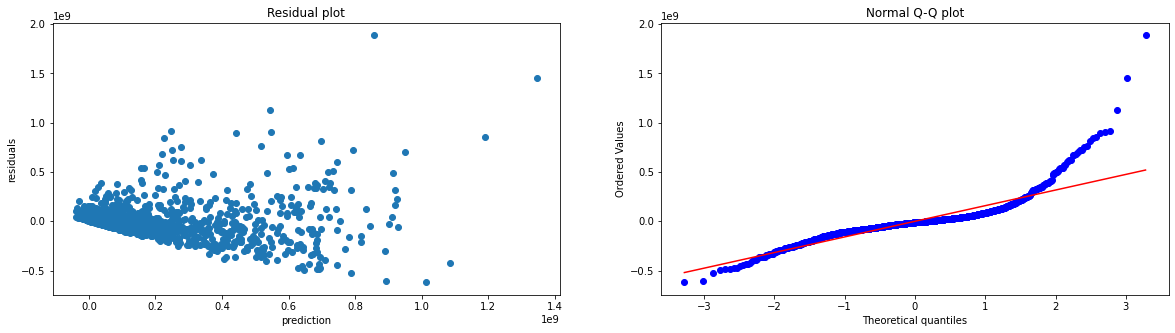

In [34]:
X=df_num.drop(columns=['total_gross', 'title'],axis=1)
y=df_num.total_gross
diagnostic_plot(X,y)

In [35]:
#seems to be outliers, remove them 

df_num.sort_values(by='total_gross').tail(10)[['total_gross', 'budget', 'runtime', 'title','year']]

,total_gross,budget,runtime,title,year
1115,1346913161,200000000,134,Black Panther,2018
749,1402805868,250000000,141,Avengers: Age of Ultron,2015
1243,1450026933,150000000,103,Frozen II,2019
751,1515047671,190000000,137,Furious 7,2015
387,1518812988,220000000,143,The Avengers,2012
1241,1656943394,260000000,118,The Lion King,2019
748,1670400637,150000000,124,Jurassic World,2015
1116,2048359754,321000000,149,Avengers: Infinity War,2018
3,2743577587,237000000,162,Avatar,2009
1240,2797501328,356000000,181,Avengers: Endgame,2019


In [36]:
pred_df = pd.DataFrame({'actual': y_val, 'predicted': y_pred_val_1, 'residual':y_val- y_pred_val_1})


pred_df.sort_values(by = 'residual', ascending = False).head(20)

,actual,predicted,residual
1240,2797501328,1.192707e+09,1.604794e+09
748,1670400637,4.952637e+08,1.175137e+09
751,1515047671,6.262061e+08,8.888416e+08
1118,1308467944,5.789229e+08,7.295450e+08
1010,962077546,3.138102e+08,6.482673e+08
1124,1148461807,5.493873e+08,5.990745e+08
397,877244782,2.934135e+08,5.838312e+08
2,709827462,1.374058e+08,5.724216e+08
998,700381748,1.397042e+08,5.606775e+08
1122,856085151,3.509574e+08,5.051278e+08


In [37]:
#df_num.sort_values(by='total_gross').head(10)[['total_gross', 'budget', 'runtime', 'title','year']]

In [38]:
# remove total_gross > 700 million 

df_num = df_num[df_num.total_gross <700000000]

In [39]:
df_num.shape

(1263, 5)

In [40]:
#OLS summary for baseline numerical values after removing outliers

X_new = df_num.drop(columns =['total_gross', 'title'], axis = 1)
X_new = sm.add_constant(X_new)
y_new = df_num['total_gross']
mod_1_new = sm.OLS(y_new, X_new, data = df_num)

fit_1_new = mod_1_new.fit()
fit_1_new.summary()

/Users/hannahkim/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     441.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.75e-196
Time:                        16:17:34   Log-Likelihood:                -25065.
No. Observations:                1263   AIC:                         5.014e+04
Df Residuals:                    1259   BIC:                         5.016e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.601e+09    1.8e+09     -1.446      0.148   -6.13e+09    9.27e+08
year        1.294e+06   8.94e+05      1.448      0.148    -4.6e+05    3.05e+06
budget         2.1864      0.063     34.798      0.000       2.063       2.310
runtime      2.58e+05   1.82e+05      1.419      0.156   -9.87e+04    6.15e+05
==============================================================================
Omnibus:                      357.488   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.578
Skew:                           1.379   Prob(JB):                    1.19e-256
Kurtosis:                       6.846   Cond. No.                     4.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

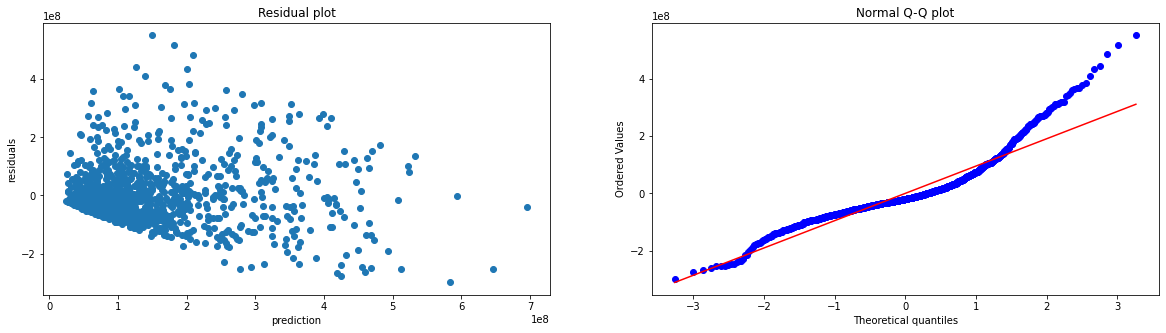

In [41]:
X_new = df_num.drop(columns =['total_gross', 'title'], axis = 1)

y_new = df_num['total_gross']
diagnostic_plot(X_new, y_new)

Add Categorical Fts into baseline model 

In [42]:
df_final.drop(columns = ['opening', 'foreign_gross', 'domestic_gross', 'distributor'], inplace = True)

In [43]:
df_final_1= df_final[df_final.total_gross <700000000]



In [44]:
df_final_1.shape

(1263, 37)

In [45]:
df_final.shape

(1339, 37)

In [46]:
df_final_1.corr()

,year,total_gross,budget,runtime,adventure,animation,biography,comedy,crime,drama,...,director_Woody Allen,director_other_director,star_Denzel Washington,star_Dwayne Johnson,star_Mark Wahlberg,star_Matt Damon,star_Robert Downey Jr.,star_Steve Carell,star_Tom Hanks,star_other_star
year,1.000000,-0.002400,-0.046978,0.078461,0.005227,0.009044,0.080708,-0.069196,0.028991,-0.030072,...,-0.027428,0.033390,0.001606,0.005771,0.020536,-0.018837,-0.058195,-0.021837,0.009791,0.032409
total_gross,-0.002400,1.000000,0.714928,0.209798,0.241166,0.031063,-0.128536,-0.163768,-0.062339,-0.131195,...,-0.038982,-0.105747,0.003802,0.047732,0.025522,0.025037,0.113236,-0.021832,0.023814,-0.097081
budget,-0.046978,0.714928,1.000000,0.251892,0.240802,-0.009610,-0.151308,-0.214238,-0.083862,-0.189483,...,-0.047580,-0.115209,0.024239,0.051847,0.022801,0.042411,0.077823,-0.023261,0.026613,-0.097815
runtime,0.078461,0.209798,0.251892,1.000000,-0.140986,-0.059865,0.195090,-0.173976,0.081379,0.149573,...,-0.063242,-0.103150,0.070916,-0.030203,0.047393,0.066792,0.053943,-0.018521,0.070974,-0.080420
adventure,0.005227,0.241166,0.240802,-0.140986,1.000000,-0.021720,-0.109560,-0.187240,-0.067731,-0.140907,...,-0.025719,-0.005022,-0.030777,-0.009661,-0.035134,-0.009661,-0.021720,0.023047,-0.029186,0.011475
animation,0.009044,0.031063,-0.009610,-0.059865,-0.021720,1.000000,-0.020049,-0.034264,-0.012394,-0.025785,...,-0.004707,-0.044035,-0.005632,-0.006429,-0.006429,-0.006429,-0.003975,-0.005909,-0.005341,0.017041
biography,0.080708,-0.128536,-0.151308,0.195090,-0.109560,-0.020049,1.000000,-0.172839,-0.062522,-0.130069,...,-0.023741,-0.067323,-0.028410,-0.005269,-0.032431,-0.005269,-0.020049,0.058706,0.038244,0.009780
comedy,-0.069196,-0.163768,-0.214238,-0.173976,-0.187240,-0.034264,-0.172839,1.000000,-0.106850,-0.222290,...,0.137360,-0.025000,-0.048553,-0.036728,0.000666,-0.018031,-0.004212,0.070916,-0.001172,-0.017901
crime,0.028991,-0.062339,-0.083862,0.081379,-0.067731,-0.012394,-0.062522,-0.106850,1.000000,-0.080410,...,-0.014677,-0.013413,0.029633,-0.020049,0.021395,-0.020049,0.054219,-0.018428,-0.016655,0.003326
drama,-0.030072,-0.131195,-0.189483,0.149573,-0.140907,-0.025785,-0.130069,-0.222290,-0.080410,1.000000,...,-0.030534,0.030176,0.014454,-0.041710,-0.041710,0.047844,-0.025785,-0.038337,0.019080,0.038794


Heatmap for Categorical Fts + Numerics 

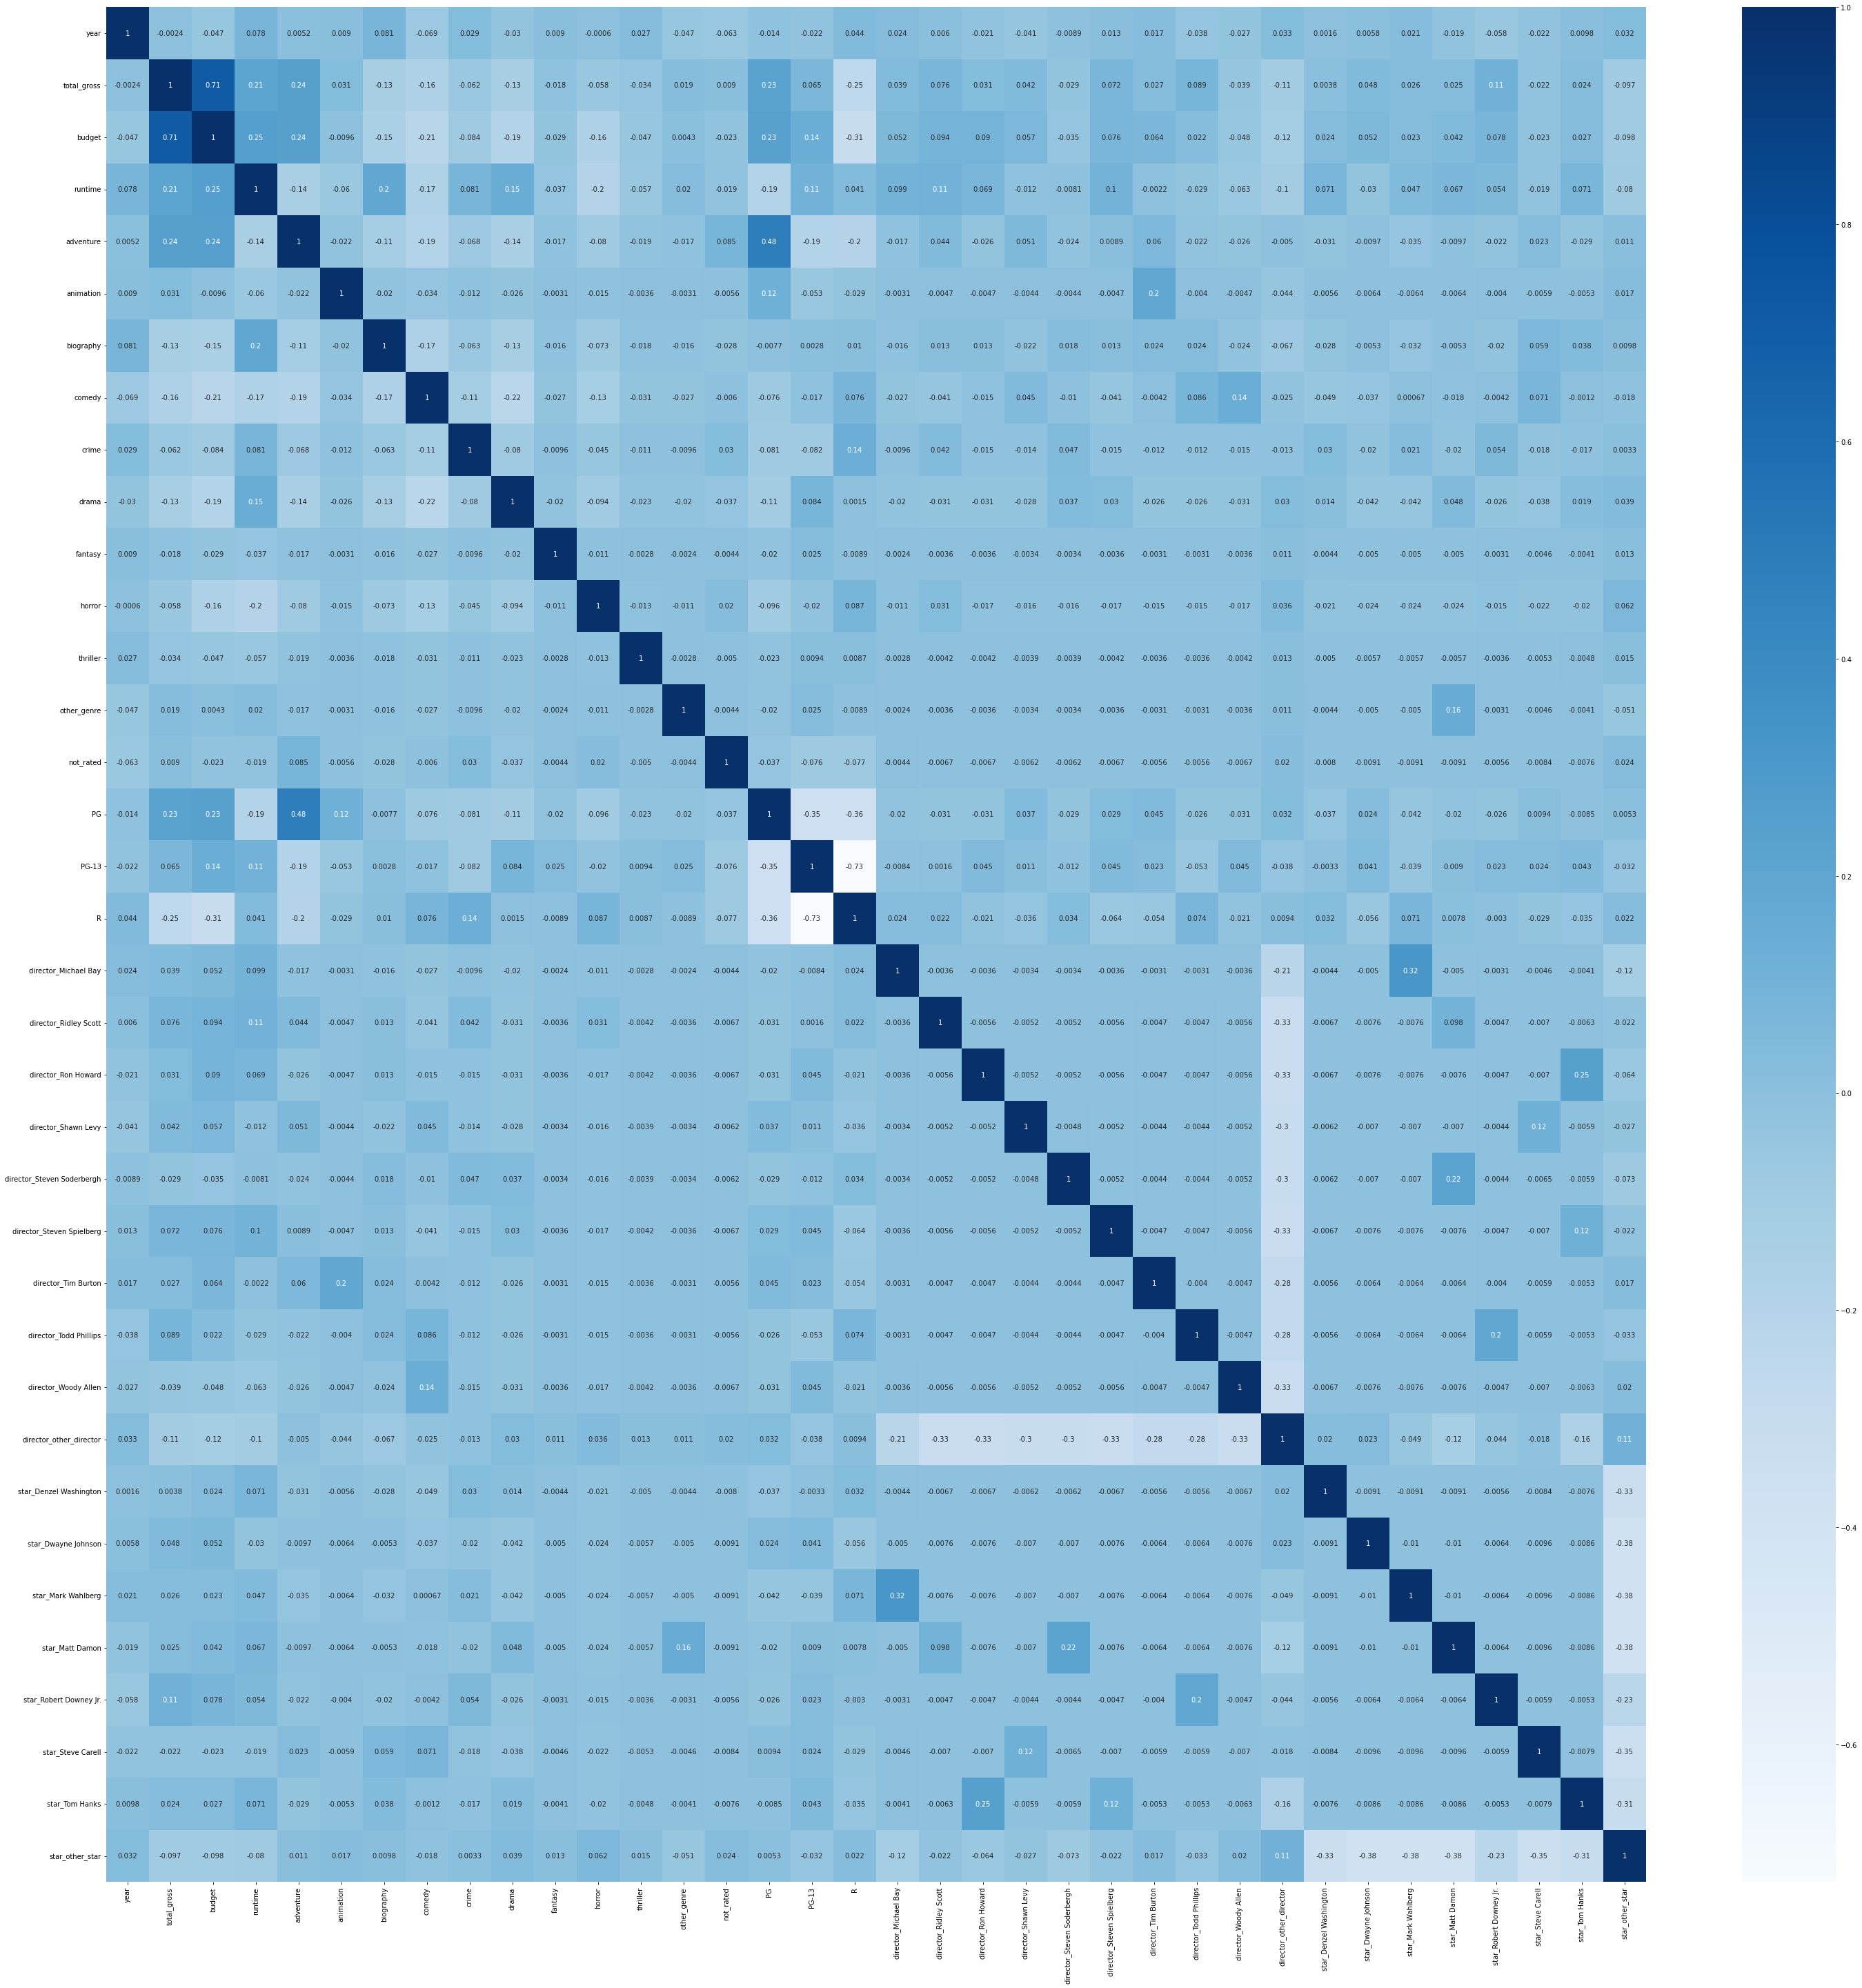

In [47]:
plt.figure(figsize = [50,50])
sns.heatmap(df_final_1.corr(), cmap = 'Blues', annot = True)
plt.savefig('Heatmap_final_categorical.png', dpi=200)


In [48]:
#OLS summary for baseline + categorical features

X1 = df_final_1.drop(columns =['total_gross', 'title'], axis = 1)
X1 = sm.add_constant(X1)
y_1 = df_final_1['total_gross']
model_1 = sm.OLS(y_1, X1)

fit1 = model_1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     42.24
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.48e-183
Time:                        16:17:50   Log-Likelihood:                -25019.
No. Observations:                1263   AIC:                         5.011e+04
Df Residuals:                    1227   BIC:                         5.030e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.192e+09   1.78e+09     -1.789      0.074   -6.69e+09    3.09e+08
year                        1.654e+06   8.87e+05      1.865      0.062   -8.64e+04    3.39e+06
budget                         2.0647      0.080     25.814      0.000       1.908       2.222
runtime                      8.04e+05   2.07e+05      3.880      0.000    3.98e+05    1.21e+06
adventure                   2.895e+07   1.15e+07      2.528      0.012    6.48e+06    5.14e+07
animation                   1.017e+08   4.59e+07      2.217      0.027    1.17e+07    1.92e+08
biography                  -1.442e+07   1.16e+07     -1.247      0.213   -3.71e+07    8.27e+06
comedy                      7.705e+06    8.4e+06      0.917      0.359   -8.78e+06    2.42e+07
crime                       3.246e+05   1.58e+07      0.021      0.984   -3.06e+07    3.12e+07
drama                       6.794e+06   9.73e+06      0.698      0.485   -1.23e+07    2.59e+07
fantasy                     2.701e+07   5.72e+07      0.472      0.637   -8.53e+07    1.39e+08
horror                      5.803e+07    1.4e+07      4.133      0.000    3.05e+07    8.56e+07
thriller                    2.009e+07   4.97e+07      0.404      0.686   -7.75e+07    1.18e+08
other_genre                 6.729e+07    5.8e+07      1.161      0.246   -4.64e+07    1.81e+08
not_rated                  -5.321e+07   5.49e+07     -0.970      0.332   -1.61e+08    5.45e+07
PG                         -6.456e+07   4.52e+07     -1.429      0.153   -1.53e+08    2.41e+07
PG-13                      -9.293e+07   4.58e+07     -2.028      0.043   -1.83e+08   -3.03e+06
R                           -9.67e+07    4.6e+07     -2.101      0.036   -1.87e+08   -6.39e+06
director_Michael Bay       -8.123e+07   6.91e+07     -1.175      0.240   -2.17e+08    5.44e+07
director_Ridley Scott       -5.67e+07   5.02e+07     -1.128      0.259   -1.55e+08    4.19e+07
director_Ron Howard        -1.214e+08   5.05e+07     -2.406      0.016    -2.2e+08   -2.24e+07
director_Shawn Levy        -5.914e+07   5.29e+07     -1.118      0.264   -1.63e+08    4.46e+07
director_Steven Soderbergh -5.479e+07   5.26e+07     -1.041      0.298   -1.58e+08    4.84e+07
director_Steven Spielberg  -4.243e+07   5.02e+07     -0.846      0.398   -1.41e+08     5.6e+07
director_Tim Burton        -1.305e+08   5.63e+07     -2.319      0.021   -2.41e+08   -2.01e+07
director_Todd Phillips      1.059e+08   5.64e+07      1.877      0.061   -4.79e+06    2.17e+08
director_Woody Allen       -5.939e+07   5.07e+07     -1.172      0.241   -1.59e+08       4e+07
director_other_director     -6.53e+07   3.37e+07     -1.937      0.053   -1.31e+08    8.48e+05
star_Denzel Washington     -5.937e+07   4.27e+07     -1.390      0.165   -1.43e+08    2.44e+07
star_Dwayne Johnson        -1.551e+07   3.9

In [49]:
#look at VIF 
VIF(X1)

,variables,vif
0,const,414936.722956
1,year,1.042333
2,budget,1.819952
3,runtime,1.463785
4,adventure,1.620571
5,animation,1.082036
6,biography,1.453179
7,comedy,1.618782
8,crime,1.159337
9,drama,1.514445


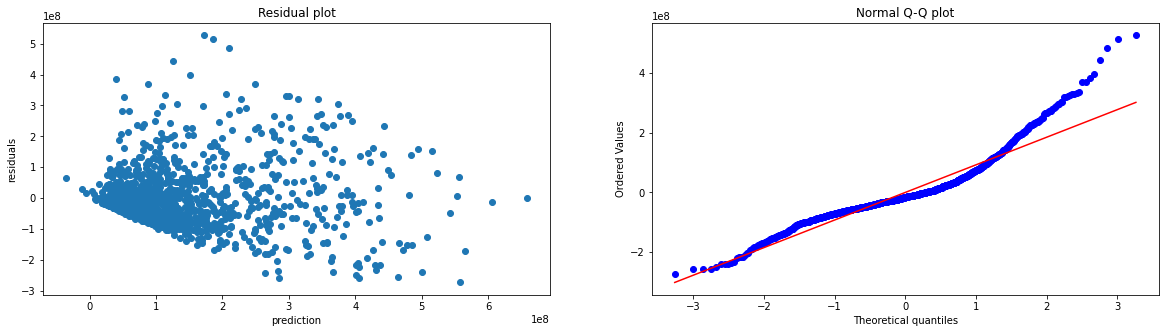

In [50]:
#look at diagnostic plot model 1 with categorical ft 
X1 = df_final_1.drop(columns =['total_gross', 'title'], axis = 1)
y1=df_final_1.total_gross
diagnostic_plot(X1,y1)

In [51]:
#drop columsn with high VIF : >5 to decrease noise 

#OLS summary for baseline + categorical features

X2 = df_final_1.drop(columns =['total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg'], axis = 1)
X2 = sm.add_constant(X2)
y = df_final_1['total_gross']
model_2 = sm.OLS(y, X2)

fit2 = model_2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     47.82
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.41e-187
Time:                        16:17:51   Log-Likelihood:                -25020.
No. Observations:                1263   AIC:                         5.010e+04
Df Residuals:                    1231   BIC:                         5.027e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -3.19e+09   1.78e+09     -1.791      0.074   -6.68e+09    3.04e+08
year                        1.647e+06   8.85e+05      1.861      0.063   -8.92e+04    3.38e+06
budget                         2.0638      0.078     26.459      0.000       1.911       2.217
runtime                      8.01e+05   2.05e+05      3.906      0.000    3.99e+05     1.2e+06
adventure                    2.92e+07   1.13e+07      2.581      0.010       7e+06    5.14e+07
animation                   1.016e+08   4.58e+07      2.220      0.027    1.18e+07    1.91e+08
biography                  -1.448e+07   1.12e+07     -1.289      0.197   -3.65e+07    7.55e+06
comedy                      7.838e+06   8.04e+06      0.975      0.330   -7.93e+06    2.36e+07
drama                       6.741e+06   9.39e+06      0.718      0.473   -1.17e+07    2.52e+07
fantasy                      2.69e+07   5.71e+07      0.471      0.638   -8.51e+07    1.39e+08
horror                      5.794e+07   1.38e+07      4.195      0.000    3.08e+07     8.5e+07
other_genre                 6.725e+07   5.78e+07      1.162      0.245   -4.62e+07    1.81e+08
not_rated                  -5.312e+07   5.48e+07     -0.969      0.333   -1.61e+08    5.44e+07
PG                         -6.422e+07   4.51e+07     -1.424      0.155   -1.53e+08    2.43e+07
PG-13                      -9.262e+07   4.57e+07     -2.025      0.043   -1.82e+08    -2.9e+06
R                          -9.652e+07    4.6e+07     -2.100      0.036   -1.87e+08   -6.36e+06
director_Michael Bay       -8.601e+07   6.71e+07     -1.281      0.200   -2.18e+08    4.57e+07
director_Ridley Scott      -5.669e+07   5.02e+07     -1.130      0.259   -1.55e+08    4.17e+07
director_Ron Howard        -1.215e+08   5.03e+07     -2.413      0.016    -2.2e+08   -2.27e+07
director_Shawn Levy        -5.942e+07   5.28e+07     -1.126      0.261   -1.63e+08    4.42e+07
director_Steven Soderbergh -5.486e+07   5.25e+07     -1.044      0.297   -1.58e+08    4.82e+07
director_Steven Spielberg  -4.252e+07   5.01e+07     -0.849      0.396   -1.41e+08    5.57e+07
director_Tim Burton        -1.307e+08   5.62e+07     -2.327      0.020   -2.41e+08   -2.05e+07
director_Todd Phillips      1.057e+08   5.63e+07      1.877      0.061   -4.77e+06    2.16e+08
director_Woody Allen       -5.975e+07   5.06e+07     -1.182      0.238   -1.59e+08    3.95e+07
director_other_director    -6.539e+07   3.36e+07     -1.945      0.052   -1.31e+08    5.81e+05
star_Denzel Washington     -4.769e+07   3.53e+07     -1.351      0.177   -1.17e+08    2.16e+07
star_Matt Damon             -4.78e+07   3.31e+07     -1.444      0.149   -1.13e+08    1.72e+07
star_Robert Downey Jr.      8.104e+07    4.8e+07      1.690      0.091   -1.31e+07    1.75e+08
star_Steve Carell           -3.44e+07   3.4

In [52]:
#look at VIF 
VIF(X2)

,variables,vif
0,const,414558.280808
1,year,1.040518
2,budget,1.735672
3,runtime,1.437980
4,adventure,1.586281
5,animation,1.079827
6,biography,1.375151
7,comedy,1.485754
8,drama,1.415771
9,fantasy,1.009605


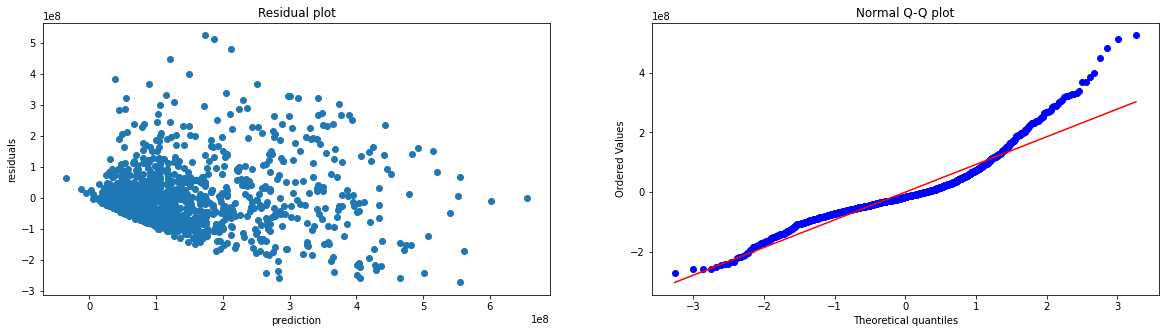

In [53]:
#look at diagnostic plot model 1 with categorical ft 
X2 = df_final_1.drop(columns =['total_gross', 'title','crime', 'drama'], axis = 1)


y2=df_final_1.total_gross
diagnostic_plot(X2,y2)

In [54]:
#drop ft where p-value > 0.3


#OLS summary for baseline + categorical features + dropped features 

X3 = df_final_1.drop(columns =['total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks'], axis = 1)

X3 = sm.add_constant(X3)
y3 = df_final_1['total_gross']
model_3 = sm.OLS(y3, X3)

fit3 = model_3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.07e-188
Time:                        16:17:51   Log-Likelihood:                -25020.
No. Observations:                1263   AIC:                         5.010e+04
Df Residuals:                    1233   BIC:                         5.025e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.183e+09   1.78e+09     -1.788      0.074   -6.67e+09    3.09e+08
year                        1.642e+06   8.84e+05      1.856      0.064   -9.34e+04    3.38e+06
budget                         2.0630      0.078     26.504      0.000       1.910       2.216
runtime                     7.942e+05   2.05e+05      3.880      0.000    3.93e+05     1.2e+06
adventure                   2.908e+07   1.13e+07      2.573      0.010     6.9e+06    5.12e+07
animation                   1.013e+08   4.57e+07      2.213      0.027    1.15e+07    1.91e+08
biography                  -1.485e+07   1.12e+07     -1.325      0.186   -3.68e+07    7.15e+06
comedy                      7.519e+06   8.01e+06      0.938      0.348    -8.2e+06    2.32e+07
drama                       6.309e+06   9.37e+06      0.674      0.501   -1.21e+07    2.47e+07
horror                      5.749e+07   1.38e+07      4.171      0.000    3.04e+07    8.45e+07
other_genre                 6.689e+07   5.78e+07      1.157      0.247   -4.65e+07     1.8e+08
not_rated                   -5.31e+07   5.48e+07     -0.970      0.332   -1.61e+08    5.43e+07
PG                         -6.408e+07   4.51e+07     -1.422      0.155   -1.53e+08    2.44e+07
PG-13                      -9.237e+07   4.57e+07     -2.021      0.043   -1.82e+08   -2.71e+06
R                          -9.628e+07   4.59e+07     -2.097      0.036   -1.86e+08   -6.18e+06
director_Michael Bay       -8.194e+07   6.66e+07     -1.230      0.219   -2.13e+08    4.87e+07
director_Ridley Scott      -5.499e+07      5e+07     -1.099      0.272   -1.53e+08    4.32e+07
director_Ron Howard        -1.243e+08      5e+07     -2.486      0.013   -2.22e+08   -2.62e+07
director_Shawn Levy        -5.781e+07   5.27e+07     -1.098      0.273   -1.61e+08    4.55e+07
director_Steven Soderbergh -5.331e+07   5.24e+07     -1.017      0.309   -1.56e+08    4.95e+07
director_Steven Spielberg  -4.296e+07      5e+07     -0.859      0.391   -1.41e+08    5.52e+07
director_Tim Burton         -1.29e+08    5.6e+07     -2.302      0.021   -2.39e+08   -1.91e+07
director_Todd Phillips      1.074e+08   5.62e+07      1.911      0.056   -2.84e+06    2.18e+08
director_Woody Allen       -5.818e+07   5.04e+07     -1.154      0.249   -1.57e+08    4.08e+07
director_other_director    -6.369e+07   3.34e+07     -1.905      0.057   -1.29e+08    1.91e+06
star_Denzel Washington      -4.42e+07   3.46e+07     -1.279      0.201   -1.12e+08    2.36e+07
star_Matt Damon              -4.4e+07   3.23e+07     -1.364      0.173   -1.07e+08    1.93e+07
star_Robert Downey Jr.      8.454e+07   4.74e+07      1.782      0.075   -8.52e+06    1.78e+08
star_Steve Carell           -3.08e+07   3.35e+07     -0.921      0.357   -9.65e+07    3.48e+07
star_other_star            -2.787e+07    1.

In [55]:

#OLS summary for baseline + categorical features + dropped features 

X4 = df_final_1.drop(columns =['total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)

X4 = sm.add_constant(X4)
y4 = df_final_1['total_gross']
model_4 = sm.OLS(y4, X4)

fit4 = model_4.fit()
fit4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     53.00
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.52e-189
Time:                        16:17:51   Log-Likelihood:                -25020.
No. Observations:                1263   AIC:                         5.010e+04
Df Residuals:                    1234   BIC:                         5.025e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.093e+09   1.77e+09     -1.743      0.082   -6.57e+09    3.88e+08
year                        1.598e+06   8.82e+05      1.812      0.070   -1.32e+05    3.33e+06
budget                         2.0437      0.072     28.256      0.000       1.902       2.186
runtime                     8.221e+05      2e+05      4.102      0.000    4.29e+05    1.22e+06
adventure                    2.78e+07   1.11e+07      2.496      0.013    5.94e+06    4.96e+07
animation                   9.935e+07   4.56e+07      2.176      0.030    9.79e+06    1.89e+08
biography                  -1.742e+07   1.05e+07     -1.653      0.099   -3.81e+07    3.26e+06
comedy                      5.473e+06   7.41e+06      0.738      0.460   -9.07e+06       2e+07
horror                      5.551e+07   1.35e+07      4.123      0.000    2.91e+07    8.19e+07
other_genre                 6.447e+07   5.77e+07      1.118      0.264   -4.87e+07    1.78e+08
not_rated                  -5.543e+07   5.46e+07     -1.014      0.311   -1.63e+08    5.18e+07
PG                         -6.508e+07    4.5e+07     -1.445      0.149   -1.53e+08    2.33e+07
PG-13                      -9.353e+07   4.57e+07     -2.048      0.041   -1.83e+08   -3.95e+06
R                          -9.795e+07   4.58e+07     -2.136      0.033   -1.88e+08      -8e+06
director_Michael Bay       -8.389e+07   6.65e+07     -1.261      0.208   -2.14e+08    4.67e+07
director_Ridley Scott      -5.598e+07      5e+07     -1.120      0.263   -1.54e+08    4.21e+07
director_Ron Howard        -1.254e+08      5e+07     -2.511      0.012   -2.23e+08   -2.74e+07
director_Shawn Levy        -5.826e+07   5.27e+07     -1.106      0.269   -1.62e+08     4.5e+07
director_Steven Soderbergh -5.348e+07   5.24e+07     -1.021      0.308   -1.56e+08    4.93e+07
director_Steven Spielberg  -4.293e+07      5e+07     -0.858      0.391   -1.41e+08    5.52e+07
director_Tim Burton         -1.29e+08    5.6e+07     -2.302      0.022   -2.39e+08    -1.9e+07
director_Todd Phillips       1.08e+08   5.62e+07      1.923      0.055   -2.17e+06    2.18e+08
director_Woody Allen       -5.891e+07   5.04e+07     -1.169      0.243   -1.58e+08       4e+07
director_other_director     -6.43e+07   3.34e+07     -1.924      0.055    -1.3e+08    1.25e+06
star_Denzel Washington     -4.438e+07   3.46e+07     -1.284      0.199   -1.12e+08    2.34e+07
star_Matt Damon            -4.271e+07   3.22e+07     -1.327      0.185   -1.06e+08    2.04e+07
star_Robert Downey Jr.      8.386e+07   4.74e+07      1.769      0.077   -9.15e+06    1.77e+08
star_Steve Carell          -3.046e+07   3.35e+07     -0.911      0.363   -9.61e+07    3.52e+07
star_other_star            -2.745e+07    1.5e+07     -1.833      0.067   -5.68e+07    1.94e+06
===========================================

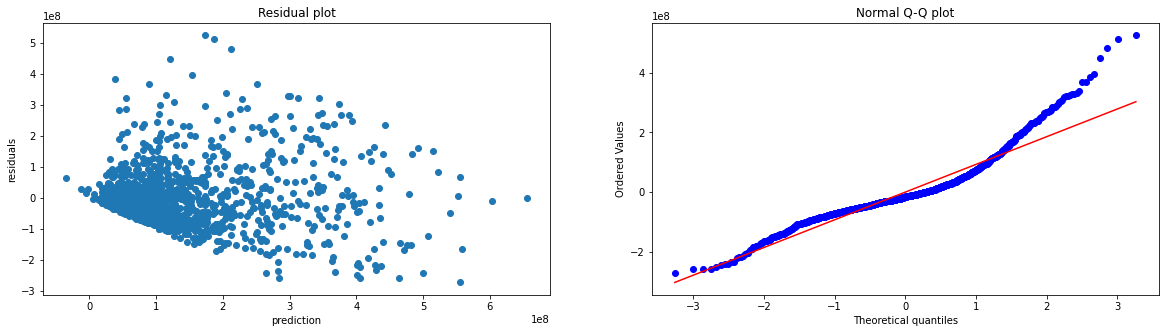

In [56]:
X4 = df_final_1.drop(columns =['total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)

y4 = df_final_1['total_gross']

diagnostic_plot(X4,y4)

In [57]:
# look at R2 , RSME val for model 4
X4 = df_final_1.drop(columns =['total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)

y4 = df_final_1['total_gross']


 

X, X_test, y, y_test = train_test_split(X4, y4, test_size = 0.2, random_state = 55)

X_train, X_val, y_train, y_val = train_test_split(X4,y4, test_size=0.25, random_state = 55) 


linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

#train
y_pred_train_1 = linreg_1.predict(X_train)
r2_train_1 = linreg_1.score(X_train,y_train)
rmse_train_1 = mean_squared_error(y_train, y_pred_train_1, squared = False)


# val 
y_pred_val_1 = linreg_1.predict(X_val)
r2_val_1 = linreg_1.score(X_val,y_val)
rmse_val_1 = mean_squared_error(y_val, y_pred_val_1, squared = False)


# test 
y_pred_test_1 = linreg_1.predict(X_test)
r2_test_1 = linreg_1.score(X_test,y_test)
rmse_test_1 = mean_squared_error(y_test, y_pred_test_1, squared = False)


print("Baseline model R2 train: ", r2_train_1)
print("Baseline model RMSE train: ", rmse_train_1)
print('-------------------------------')
print("Baseline model R2 val: ", r2_val_1)
print("Baseline model RMSE val: ", rmse_val_1)
print('-------------------------------')
print("Baseline model R2 test: ", r2_test_1)
print("Baseline model RMSE test: ", rmse_test_1)

Baseline model R2 train:  0.537490613601038
Baseline model RMSE train:  97572317.13624674
-------------------------------
Baseline model R2 val:  0.5562603312392093
Baseline model RMSE val:  96970695.67847016
-------------------------------
Baseline model R2 test:  0.5337315180510798
Baseline model RMSE test:  99523543.82076697


/var/folders/vl/msb_49ms6zn68_cx7zq3jx4w0000gn/T/ipykernel_782/3315594389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_1['log_total_gross'] = np.log(df_final_1.total_gross)


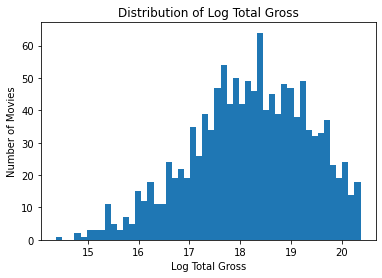

In [58]:
#see if log transformation on target helps to lower error
df_final_1['log_total_gross'] = np.log(df_final_1.total_gross)
plt.hist(df_final_1.log_total_gross, bins = 50)
plt.title('Distribution of Log Total Gross')
plt.xlabel('Log Total Gross')
plt.ylabel('Number of Movies')
plt.savefig('Log_tranformation.png', dpi=200)

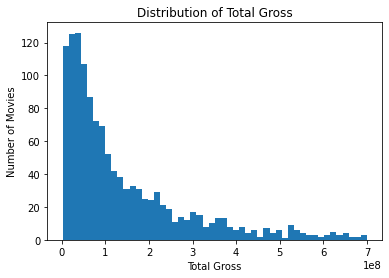

In [59]:
#see if w/log transformation (outliers removed )on target helps with R2 
plt.hist(df_final_1.total_gross, bins = 50)
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Number of Movies')
plt.savefig('Total_Gross.png', dpi=200)

In [60]:
df_final_1.columns

Index(['title', 'year', 'total_gross', 'budget', 'runtime', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'drama', 'fantasy',
       'horror', 'thriller', 'other_genre', 'not_rated', 'PG', 'PG-13', 'R',
       'director_Michael Bay', 'director_Ridley Scott', 'director_Ron Howard',
       'director_Shawn Levy', 'director_Steven Soderbergh',
       'director_Steven Spielberg', 'director_Tim Burton',
       'director_Todd Phillips', 'director_Woody Allen',
       'director_other_director', 'star_Denzel Washington',
       'star_Dwayne Johnson', 'star_Mark Wahlberg', 'star_Matt Damon',
       'star_Robert Downey Jr.', 'star_Steve Carell', 'star_Tom Hanks',
       'star_other_star', 'log_total_gross'],
      dtype='object')

In [61]:
X_log = df_final_1.drop(columns =['log_total_gross','total_gross', 'title'], axis = 1)
X_log = sm.add_constant(X_log)
y_log = df_final_1['log_total_gross']
model_1og = sm.OLS(y_log, X_log)

fit_log = model_1og.fit()
fit_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_gross   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     28.90
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.92e-134
Time:                        16:17:53   Log-Likelihood:                -1595.7
No. Observations:                1263   AIC:                             3263.
Df Residuals:                    1227   BIC:                             3449.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         20.9024     15.741      1.328      0.184      -9.980      51.785
year                          -0.0013      0.008     -0.168      0.866      -0.017       0.014
budget                      1.352e-08   7.06e-10     19.157      0.000    1.21e-08    1.49e-08
runtime                        0.0096      0.002      5.262      0.000       0.006       0.013
adventure                      0.1362      0.101      1.349      0.178      -0.062       0.334
animation                      0.2624      0.405      0.648      0.517      -0.532       1.057
biography                     -0.3465      0.102     -3.397      0.001      -0.547      -0.146
comedy                         0.0124      0.074      0.167      0.868      -0.133       0.158
crime                         -0.1234      0.139     -0.888      0.375      -0.396       0.149
drama                         -0.1453      0.086     -1.693      0.091      -0.314       0.023
fantasy                        0.3450      0.505      0.683      0.494      -0.645       1.335
horror                         0.5853      0.124      4.726      0.000       0.342       0.828
thriller                       0.3274      0.439      0.746      0.456      -0.534       1.188
other_genre                    0.8268      0.511      1.617      0.106      -0.176       1.830
not_rated                     -0.6158      0.484     -1.272      0.204      -1.566       0.334
PG                            -0.1974      0.399     -0.495      0.621      -0.980       0.585
PG-13                         -0.4779      0.404     -1.182      0.237      -1.271       0.315
R                             -0.6071      0.406     -1.495      0.135      -1.404       0.190
director_Michael Bay          -1.3013      0.610     -2.135      0.033      -2.497      -0.105
director_Ridley Scott         -0.7997      0.443     -1.804      0.071      -1.669       0.070
director_Ron Howard           -1.1831      0.445     -2.658      0.008      -2.056      -0.310
director_Shawn Levy           -0.6317      0.467     -1.354      0.176      -1.547       0.284
director_Steven Soderbergh    -0.5130      0.464     -1.105      0.269      -1.424       0.398
director_Steven Spielberg     -0.5582      0.443     -1.261      0.208      -1.426       0.310
director_Tim Burton           -1.0202      0.496     -2.056      0.040      -1.994      -0.047
director_Todd Phillips         0.4226      0.498      0.849      0.396      -0.554       1.399
director_Woody Allen          -0.6713      0.447     -1.502      0.133      -1.548       0.205
director_other_director       -0.8348      0.297     -2.807      0.005      -1.418      -0.251
star_Denzel Washington        -0.2202      0.377     -0.584      0.559      -0.959       0.519
star_Dwayne Johnson           -0.1058      

In [62]:
#look at R2 values and RSME values for log transformtion

X_log = df_final_1.drop(columns =['log_total_gross','total_gross', 'title'], axis = 1)

y_log = df_final_1['log_total_gross']

X, X_test, y, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 60)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state = 60) 


linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

#train
y_pred_train_1 = linreg_1.predict(X_train)
r2_train_1 = linreg_1.score(X_train,y_train)
rmse_train_1 = mean_squared_error(y_train, y_pred_train_1, squared = False)


# val 
y_pred_val_1 = linreg_1.predict(X_val)
r2_val_1 = linreg_1.score(X_val,y_val)
rmse_val_1 = mean_squared_error(y_val, y_pred_val_1, squared = False)


# test 
y_pred_test_1 = linreg_1.predict(X_test)
r2_test_1 = linreg_1.score(X_test,y_test)
rmse_test_1 = mean_squared_error(y_test, y_pred_test_1, squared = False)


print("R2 train: ", r2_train_1)
print("RMSE train: ", rmse_train_1)
print('-------------------------------')
print("R2 val: ", r2_val_1)
print("RMSE val: ", rmse_val_1)
print('-------------------------------')
print("R2 test: ", r2_test_1)
print("RMSE test: ", rmse_test_1)

R2 train:  0.44991766557793145
RMSE train:  0.8473985758726346
-------------------------------
R2 val:  0.4245547750090798
RMSE val:  0.8474173426615516
-------------------------------
R2 test:  0.41409074296277815
RMSE test:  0.9336721178911284


In [63]:
#check the residual 
pred_df = pd.DataFrame({'actual': y_val, 'predicted': y_pred_val_1, 'residual':y_val- y_pred_val_1})


pred_df.sort_values(by = 'residual', ascending = False).head(20)

,actual,predicted,residual
241,19.865242,17.448221,2.417021
760,20.160535,17.879349,2.281186
1123,19.893586,17.941371,1.952215
145,20.364433,18.589472,1.774962
400,19.745475,17.970819,1.774656
287,19.191703,17.498431,1.693271
634,19.964109,18.476268,1.487840
468,19.281089,17.817749,1.463340
389,20.358551,18.900620,1.457931
25,20.077057,18.647906,1.429151


In [64]:
X_log1 = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.'], axis = 1)
X_log1 = sm.add_constant(X_log1)
y_log1 = df_final_1['log_total_gross']
model_1og1 = sm.OLS(y_log1, X_log1)

fit_log1 = model_1og1.fit()
fit_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_gross   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     33.82
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.35e-138
Time:                        16:17:53   Log-Likelihood:                -1596.0
No. Observations:                1263   AIC:                             3254.
Df Residuals:                    1232   BIC:                             3413.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         20.9509     15.652      1.339      0.181      -9.756      51.658
year                          -0.0014      0.008     -0.176      0.860      -0.017       0.014
budget                      1.345e-08    6.6e-10     20.389      0.000    1.22e-08    1.47e-08
runtime                        0.0096      0.002      5.260      0.000       0.006       0.013
adventure                      0.1268      0.096      1.320      0.187      -0.062       0.315
biography                     -0.3556      0.095     -3.760      0.000      -0.541      -0.170
crime                         -0.1326      0.134     -0.989      0.323      -0.396       0.131
drama                         -0.1530      0.078     -1.973      0.049      -0.305      -0.001
fantasy                        0.3368      0.502      0.670      0.503      -0.649       1.323
horror                         0.5766      0.117      4.922      0.000       0.347       0.806
thriller                       0.3184      0.436      0.730      0.466      -0.537       1.174
other_genre                    0.8211      0.509      1.612      0.107      -0.178       1.820
not_rated                     -0.6229      0.483     -1.290      0.197      -1.570       0.324
PG                            -0.1960      0.398     -0.493      0.622      -0.976       0.584
PG-13                         -0.4861      0.403     -1.206      0.228      -1.277       0.304
R                             -0.6152      0.405     -1.520      0.129      -1.410       0.179
director_Michael Bay          -1.3136      0.592     -2.220      0.027      -2.474      -0.153
director_Ridley Scott         -0.7965      0.442     -1.801      0.072      -1.664       0.071
director_Ron Howard           -1.1839      0.444     -2.665      0.008      -2.056      -0.312
director_Shawn Levy           -0.6317      0.465     -1.357      0.175      -1.545       0.281
director_Steven Soderbergh    -0.5151      0.463     -1.112      0.266      -1.424       0.394
director_Steven Spielberg     -0.5601      0.442     -1.268      0.205      -1.427       0.307
director_Tim Burton           -0.9684      0.489     -1.981      0.048      -1.927      -0.009
director_Todd Phillips         0.4103      0.489      0.839      0.402      -0.549       1.370
director_Woody Allen          -0.6694      0.445     -1.505      0.133      -1.542       0.203
director_other_director       -0.8368      0.297     -2.819      0.005      -1.419      -0.254
star_Denzel Washington        -0.1434      0.307     -0.468      0.640      -0.745       0.458
star_Matt Damon               -0.5780      0.288     -2.008      0.045      -1.143      -0.013
star_Steve Carell             -0.5838      0.298     -1.962      0.050      -1.167   -9.83e-05
star_Tom Hanks                -0.2185      

In [65]:
X_log2 = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)
X_log2 = sm.add_constant(X_log2)
y_log2 = df_final_1['log_total_gross']
model_1og2 = sm.OLS(y_log2, X_log2)

fit_log2 = model_1og2.fit()
fit_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_gross   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     40.60
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.28e-141
Time:                        16:17:53   Log-Likelihood:                -1597.1
No. Observations:                1263   AIC:                             3246.
Df Residuals:                    1237   BIC:                             3380.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         21.1882     15.619      1.357      0.175      -9.455      51.831
year                          -0.0015      0.008     -0.197      0.844      -0.017       0.014
budget                       1.35e-08   6.56e-10     20.591      0.000    1.22e-08    1.48e-08
runtime                        0.0094      0.002      5.169      0.000       0.006       0.013
adventure                      0.1307      0.095      1.371      0.171      -0.056       0.318
biography                     -0.3609      0.094     -3.830      0.000      -0.546      -0.176
crime                         -0.1368      0.134     -1.023      0.307      -0.399       0.126
drama                         -0.1578      0.077     -2.043      0.041      -0.309      -0.006
horror                         0.5715      0.117      4.889      0.000       0.342       0.801
thriller                       0.3135      0.436      0.720      0.472      -0.541       1.168
other_genre                    0.8229      0.509      1.618      0.106      -0.175       1.821
not_rated                     -0.4309      0.284     -1.518      0.129      -0.988       0.126
PG-13                         -0.2909      0.086     -3.365      0.001      -0.461      -0.121
R                             -0.4173      0.090     -4.638      0.000      -0.594      -0.241
director_Michael Bay          -1.4155      0.559     -2.532      0.011      -2.512      -0.319
director_Ridley Scott         -0.9347      0.406     -2.303      0.021      -1.731      -0.138
director_Ron Howard           -1.3719      0.404     -3.395      0.001      -2.165      -0.579
director_Shawn Levy           -0.7777      0.429     -1.814      0.070      -1.619       0.064
director_Steven Soderbergh    -0.6505      0.429     -1.515      0.130      -1.493       0.192
director_Steven Spielberg     -0.7212      0.406     -1.778      0.076      -1.517       0.075
director_Tim Burton           -1.1130      0.455     -2.447      0.015      -2.005      -0.221
director_Woody Allen          -0.8134      0.406     -2.002      0.046      -1.610      -0.016
director_other_director       -0.9762      0.237     -4.121      0.000      -1.441      -0.511
star_Matt Damon               -0.5353      0.276     -1.937      0.053      -1.078       0.007
star_Steve Carell             -0.5308      0.288     -1.845      0.065      -1.095       0.034
star_other_star               -0.3265      0.116     -2.826      0.005      -0.553      -0.100
==============================================================================
Omnibus:                       32.545   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.970
Skew:                          -0.373   Prob(JB):                     2.55e-08
Kurtosis:   

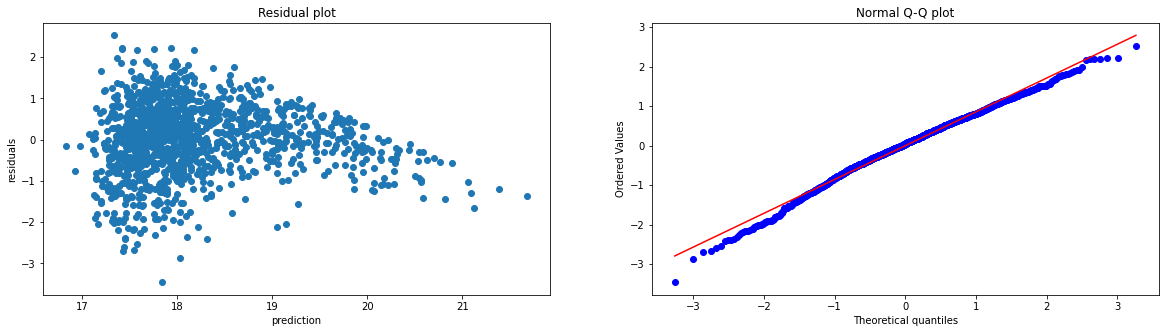

In [66]:
X_log2 = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)

y_log2 = df_final_1['log_total_gross']

diagnostic_plot(X_log2, y_log2)

In [67]:
#look at R2 values and RSME values for log transformtion

X_log2 = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)
y_log2 = df_final_1['log_total_gross']

X, X_test, y, y_test = train_test_split(X_log2, y_log2, test_size = 0.2, random_state = 60)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state = 60) 


linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

#train
y_pred_train_1 = linreg_1.predict(X_train)
r2_train_1 = linreg_1.score(X_train,y_train)
rmse_train_1 = mean_squared_error(y_train, y_pred_train_1, squared = False)


# val 
y_pred_val_1 = linreg_1.predict(X_val)
r2_val_1 = linreg_1.score(X_val,y_val)
rmse_val_1 = mean_squared_error(y_val, y_pred_val_1, squared = False)


# test 
y_pred_test_1 = linreg_1.predict(X_test)
r2_test_1 = linreg_1.score(X_test,y_test)
rmse_test_1 = mean_squared_error(y_test, y_pred_test_1, squared = False)


print("R2 train: ", r2_train_1)
print("RMSE train: ", rmse_train_1)
print('-------------------------------')
print("R2 val: ", r2_val_1)
print("RMSE val: ", rmse_val_1)
print('-------------------------------')
print("R2 test: ", r2_test_1)
print("RMSE test: ", rmse_test_1)

R2 train:  0.4449457856743134
RMSE train:  0.8512195371843684
-------------------------------
R2 val:  0.43072420656339083
RMSE val:  0.8428624593739509
-------------------------------
R2 test:  0.43889297944157535
RMSE test:  0.9136967101671318


In [68]:
#check residuals

#check the residual 
pred_df = pd.DataFrame({'actual': y_val, 'predicted': y_pred_val_1, 'residual':y_val- y_pred_val_1})


pred_df.sort_values(by = 'residual', ascending = False).head(20)

,actual,predicted,residual
241,19.865242,17.423213,2.442029
760,20.160535,17.871208,2.289327
1123,19.893586,17.930368,1.963218
145,20.364433,18.589524,1.774910
400,19.745475,17.984592,1.760884
287,19.191703,17.509043,1.682660
389,20.358551,18.894308,1.464243
468,19.281089,17.817286,1.463802
634,19.964109,18.515612,1.448497
4,19.965714,18.525606,1.440108


In [69]:
#LOG 2 model 
X_log_m = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)

y_log_m = df_final_1['log_total_gross']

X, X_test, y, y_test = train_test_split(X_log_m, y_log_m, test_size=.2, random_state=10) 
X, y = np.array(X), np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state = 70)

#collect the validation results for both models
cv_lm_r2s_tr, cv_lm_pol_r2s_tr, cv_lm_rid_r2s_tr, cv_lm_las_r2s_tr, cv_lm_pr_r2s_tr, cv_lm_pl_r2s_tr  = [], [] , [], [], [], []
cv_lm_r2s, cv_lm_pol_r2s, cv_lm_rid_r2s, cv_lm_las_r2s, cv_lm_pr_r2s, cv_lm_pl_r2s  = [], [] , [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #feature scaling 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    poly = PolynomialFeatures(degree = 2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    #scaled poly when using in conjuction w/ poly+Ridge and poly+Lasso models
    
    X_train_sc_pol = scaler.fit_transform(X_train_poly)
    X_val_sc_pol = scaler.transform(X_val_poly)

    #Simple Linear Regression 
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))
    
    #Polynomial regression 
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_pol_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_pol_r2s_tr.append(lm_poly.score(X_train_poly, y_train))

    #Ridge w/ feature scaling
    lm_reg = Ridge(alpha=2)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))

    
    #lasso w/ feature scaling
    lm_lasso = Lasso(alpha=0.05)
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_las_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    
    #poly + ridge
    lm_pr = Ridge(alpha=2)
    lm_pr.fit(X_train_sc_pol, y_train)
    cv_lm_pr_r2s.append(lm_pr.score(X_val_sc_pol, y_val))
    cv_lm_pr_r2s_tr.append(lm_pr.score(X_train_sc_pol, y_train))
    
    
    #lasso + ridge 
    lm_pl = Lasso(alpha=0.05)
    lm_pl.fit(X_train_sc_pol, y_train)
    cv_lm_pl_r2s.append(lm_pl.score(X_val_sc_pol, y_val))
    cv_lm_pl_r2s_tr.append(lm_pl.score(X_train_sc_pol, y_train))

print('Baseline Model:\n')  
print("Training:\n" )

print('Simple Linear regression R2: ', cv_lm_r2s_tr)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}\n')

print('Polynomial Regression R2 scores: ', cv_lm_pol_r2s_tr)
print(f'Poly Regression mean cv r^2: {np.mean(cv_lm_pol_r2s_tr):.3f} +- {np.std(cv_lm_pol_r2s_tr):.3f}\n')

print('Ridge R2 scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}\n')

print('Lasso R2 scores: ', cv_lm_las_r2s_tr)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s_tr):.3f} +- {np.std(cv_lm_las_r2s_tr):.3f}\n')

print('Poly + Ridge R2 scores: ', cv_lm_pr_r2s_tr)
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_pr_r2s_tr):.3f} +- {np.std(cv_lm_pr_r2s_tr):.3f}\n')

print('Poly + Lasso R2 scores: ', cv_lm_pl_r2s_tr)
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_pl_r2s_tr):.3f} +- {np.std(cv_lm_pl_r2s_tr):.3f}\n')


print("Val:\n")
print('Simple Linear regression R2: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}\n')

print('Polynomial Regression R2 scores: ', cv_lm_pol_r2s)
print(f'Poly Regression mean cv r^2: {np.mean(cv_lm_pol_r2s):.3f} +- {np.std(cv_lm_pol_r2s):.3f}\n')

print('Ridge R2 scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}\n')

print('Lasso R2 scores: ', cv_lm_las_r2s)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s_tr):.3f} +- {np.std(cv_lm_las_r2s_tr):.3f}\n')

print('Poly + Ridge R2 scores: ', cv_lm_pr_r2s)
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_pr_r2s):.3f} +- {np.std(cv_lm_pr_r2s):.3f}\n')

print('Poly + Lasso R2 scores: ', cv_lm_pl_r2s)
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_pl_r2s):.3f} +- {np.std(cv_lm_pl_r2s):.3f}\n')


Baseline Model:

Training:

Simple Linear regression R2:  [0.452058689031667, 0.4934718205736285, 0.47122043844591666, 0.4618081678558522, 0.4725882358031387]
Simple mean cv r^2: 0.470 +- 0.014

Polynomial Regression R2 scores:  [0.3840561963654239, 0.36961003016910343, 0.47164039815664915, 0.5220532016342945, 0.5155624901153442]
Poly Regression mean cv r^2: 0.453 +- 0.064

Ridge R2 scores:  [0.45205277967675284, 0.493466394953185, 0.4712130607601215, 0.4618031562916417, 0.47258240129782736]
Ridge mean cv r^2: 0.470 +- 0.014

Lasso R2 scores:  [0.42102303283931186, 0.45840328303736, 0.4368493114793838, 0.4337369617061888, 0.4384169116446385]
Lasso mean cv r^2: 0.438 +- 0.012

Poly + Ridge R2 scores:  [0.5593230093106023, 0.5792669696753509, 0.5696261970237694, 0.5570611665154417, 0.5699451574576737]
Poly + Ridge mean cv r^2: 0.567 +- 0.008

Poly + Lasso R2 scores:  [0.4443427272972962, 0.4841737514921546, 0.46257663449964515, 0.46666530205348833, 0.47145890169752747]
Poly + Lasso mean 

In [70]:
#look at test R2 
#scaler 


scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

    
#scaled poly when using in conjuction w/ poly+Ridge and poly+Lasso models
    
X_sc_pol = scaler.fit_transform(X_poly)
X_test_sc_pol = scaler.transform(X_test_poly)

#Simple Linear Test R2 Score
lm.fit(X,y)
lin_pred = lm.predict(X_test)
linear_test_r2 = lm.score(X_test, y_test)
linear_test_r2 = np.round(linear_test_r2,6)
#Poly Test R2 Score
lm_poly.fit(X_poly, y)
poly_pred= lm_poly.predict(X_test_poly)
poly_test_r2 = lm_poly.score(X_test_poly,y_test)
poly_test_r2 = np.round(poly_test_r2,6)
#Ridge Test R2 Score  
lm_reg.fit(X_scale, y)
ridge_pred = lm_reg.predict(X_test_scaled)
ridge_test_r2 = lm_reg.score(X_test_scaled, y_test)
ridge_test_r2= np.round(ridge_test_r2,6)
#Lasso Test R2 Score
lm_lasso.fit(X_scale, y)
lasso_pred = lm_lasso.predict(X_test_scaled)
lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)
lasso_test_r2 = np.round(lasso_test_r2,6)
#Poly + Ridge Test R2 Score
lm_pr.fit(X_sc_pol, y)
poly_pred = lm_pr.predict(X_test_sc_pol)
poly_ridge_test_r2 = lm_pr.score(X_test_sc_pol, y_test)
poly_ridge_test_r2 = np.round(poly_ridge_test_r2,6)
#Poly + Lasso Test R2 Score
lm_pl.fit(X_sc_pol, y)
poly_lasso_test_pred = lm_pl.predict(X_test_sc_pol)
poly_lasso_test_r2 = lm_pl.score(X_test_sc_pol, y_test)
poly_lasso_test_r2 = np.round(poly_lasso_test_r2,6)

print('Test:')
print(f"Simple Linear Regression R2 score: {linear_test_r2}")
print(f"Polynomial R2 score: {poly_test_r2}")
print(f"Ridge R2 score: {ridge_test_r2}")
print(f"Lasso R2 score: {lasso_test_r2}")
print(f"Poly+Ridge R2 score: {poly_ridge_test_r2}")
print(f"Poly+Lasso R2 score: {poly_lasso_test_r2}")


Test:
Simple Linear Regression R2 score: 0.342886
Polynomial R2 score: -0.07354
Ridge R2 score: 0.343501
Lasso R2 score: 0.323694
Poly+Ridge R2 score: 0.218896
Poly+Lasso R2 score: 0.319419


/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [71]:
#Get Ridge best alpha 

X_log_m = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)

y_log_m = df_final_1['log_total_gross']


X, X_test, y, y_test = train_test_split(X_log_m, y_log_m, test_size=.2, random_state=10) #hold out 20% of the data for final testing

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

set_alpha = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = set_alpha)
 
ridge_model.fit(X_scale, y)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_test_r2 = ridge_model.score(X_test_scaled, y_test)
ridge_test_r2= np.round(ridge_test_r2,6)

print(ridge_test_r2)

print(f'Ridge Alpha: {ridge_model.alpha_}')
print(f'Ridge Model Coeff: {ridge_model.coef_}')

0.352442
Ridge Alpha: 36.123426997094306
Ridge Model Coeff: [ 0.00501581  0.6515706   0.13980236  0.05018223 -0.08296582 -0.03168768
 -0.03344626  0.11427336  0.02074768  0.04237745 -0.03438819 -0.10969613
 -0.16456549 -0.06577694 -0.04066648 -0.08075561 -0.03881176 -0.01159498
 -0.04102715 -0.06144521 -0.04889318 -0.17582963 -0.06738502 -0.03120263
 -0.08741051]


/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


In [72]:
#LOG 2 model train + val with best alpha
X_log_m = df_final_1.drop(columns =['log_total_gross','total_gross', 'title', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)

y_log_m = df_final_1['log_total_gross']

X, X_test, y, y_test = train_test_split(X_log_m, y_log_m, test_size=.2, random_state=10) 
X, y = np.array(X), np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state = 70)

#collect the validation results for both models
cv_lm_rid_r2s_tr   = []
cv_lm_rid_r2s = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #feature scaling 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    #scaled poly when using in conjuction w/ poly+Ridge and poly+Lasso models
    
    X_train_sc_pol = scaler.fit_transform(X_train_poly)
    X_val_sc_pol = scaler.transform(X_val_poly)


    #Ridge w/ feature scaling
    lm_reg = Ridge(alpha=36.123426997094306)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))



print('Baseline Model:\n')  
print("Training:\n" )

print('Ridge R2 scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}\n')


print("Val:\n")
print('Simple Linear regression R2: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}\n')


print('Ridge R2 scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}\n')



Baseline Model:

Training:

Ridge R2 scores:  [0.4506461852512682, 0.4921120669794423, 0.46952084883673384, 0.460533359120752, 0.4711295847074425]
Ridge mean cv r^2: 0.469 +- 0.014

Val:

Simple Linear regression R2:  [0.5008808458066243, 0.3326659180427747, 0.43067620583775157, 0.46975089482691457, 0.41631173198064586]
Simple mean cv r^2: 0.430 +- 0.057

Ridge R2 scores:  [0.495452518035695, 0.3352837375952519, 0.429760769843584, 0.4678165168826821, 0.4294792694632793]
Ridge mean cv r^2: 0.432 +- 0.054



In [73]:
#look at test R2 
#scaler 


scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)


#Ridge Test R2 Score  
lm_reg.fit(X_scale, y)
ridge_pred = lm_reg.predict(X_test_scaled)
ridge_test_r2 = lm_reg.score(X_test_scaled, y_test)
ridge_test_r2= np.round(ridge_test_r2,6)


print('Test:')

print(f"Ridge R2 score: {ridge_test_r2}")


Test:
Ridge R2 score: 0.352442


/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [74]:
#get list of features and coeff for interpretation 

ft_list= {'features': X_log_m.columns,'coef': ridge_model.coef_}
coef_df = pd.DataFrame(ft_list)
coef_df

,features,coef
0,year,0.005016
1,budget,0.651571
2,runtime,0.139802
3,adventure,0.050182
4,biography,-0.082966
5,crime,-0.031688
6,drama,-0.033446
7,horror,0.114273
8,thriller,0.020748
9,other_genre,0.042377


In [75]:
sorted_coef_df = coef_df.sort_values(by='coef')

In [76]:
sorted_coef_df

,features,coef
21,director_other_director,-0.175830
12,R,-0.164565
11,PG-13,-0.109696
24,star_other_star,-0.087411
4,biography,-0.082966
15,director_Ron Howard,-0.080756
22,star_Matt Damon,-0.067385
13,director_Michael Bay,-0.065777
19,director_Tim Burton,-0.061445
20,director_Woody Allen,-0.048893


In [77]:
sorted_coef_df[sorted_coef_df.coef >0]

,features,coef
0,year,0.005016
8,thriller,0.020748
9,other_genre,0.042377
3,adventure,0.050182
7,horror,0.114273
2,runtime,0.139802
1,budget,0.651571


In [78]:
final_sort = sorted_coef_df.sort_values(by='coef', ascending = False)
final_sort

,features,coef
1,budget,0.651571
2,runtime,0.139802
7,horror,0.114273
3,adventure,0.050182
9,other_genre,0.042377
8,thriller,0.020748
0,year,0.005016
17,director_Steven Soderbergh,-0.011595
23,star_Steve Carell,-0.031203
5,crime,-0.031688


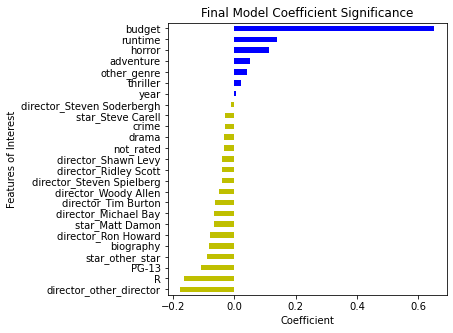

In [79]:
#show coeff barplot on distribution 
plt.rcParams["figure.figsize"] = (5,5)
set_color = ['y', 'y', 'y', 'y','y', 'y','y', 'y','y', 'y','y', 'y','y', 'y','y',
             'y', 'y', 'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
sorted_coef_df.plot.barh('features', 'coef', color = set_color, legend = None)

plt.xlabel('Coefficient')
plt.ylabel('Features of Interest')
plt.title('Final Model Coefficient Significance')

plt.savefig('Coeff_distribution.png', dpi=200, bbox_inches="tight")

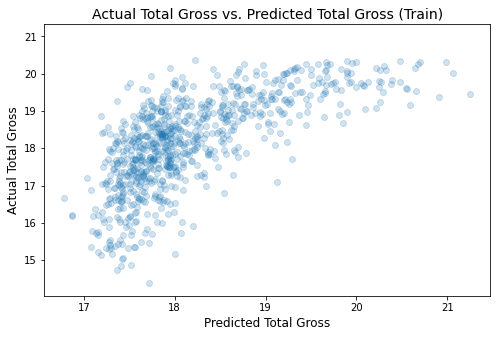

In [80]:
#Ridge model graph: Actual vs Predicted

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lm_reg.fit(X_train_scaled, y_train)
ridge_predict= lm_reg.predict(X_train_scaled)

plt.figure(figsize=(8,5))
plt.scatter(ridge_predict, y_train, alpha=0.2)
plt.plot([21,21], [21,21])

plt.title('Actual Total Gross vs. Predicted Total Gross (Train)', fontsize=14)
plt.xlabel('Predicted Total Gross', fontsize=12)
plt.ylabel('Actual Total Gross', fontsize=12);


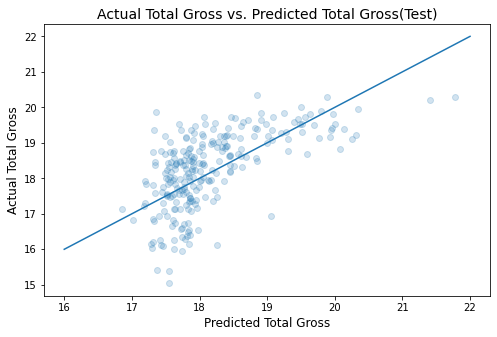

In [81]:
#Ridge model graph: Actual vs Predicted

plt.figure(figsize=(8,5))
plt.scatter(ridge_pred, y_test, alpha=0.2)
plt.plot([16,22], [16,22])

plt.title('Actual Total Gross vs. Predicted Total Gross(Test)', fontsize=14)
plt.xlabel('Predicted Total Gross', fontsize=12)
plt.ylabel('Actual Total Gross', fontsize=12);

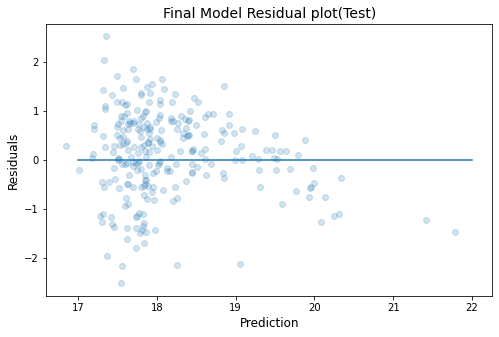

In [82]:
#residual graph for Ridge model 

resid = y_test - ridge_pred
plt.figure(figsize=(8,5))

plt.scatter(ridge_pred, resid, alpha=0.2)
plt.plot([17,22], [0,0])
plt.title("Final Model Residual plot(Test)", size=14)
plt.xlabel("Prediction", size=12)
plt.ylabel("Residuals", size=12);

In [83]:
#test-prediction 
test_movie = df_final_1.drop(columns =['log_total_gross','total_gross', 'animation', 
                                  'comedy', 'star_Dwayne Johnson', 
                                  'star_Mark Wahlberg', 
                                  'star_Robert Downey Jr.',
                                  'PG', 'fantasy', 'star_Tom Hanks', 
                                  'star_Denzel Washington', 'director_Todd Phillips'], axis = 1)






In [84]:
m = test_movie[test_movie.title == 'Jojo Rabbit']
m.values

array([['Jojo Rabbit', 2019, 14000000, 108, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=object)

In [85]:
test_movie_Jojo_Rabbit_19 = [2019, 14000000, 108, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

jojo_rabbit = ridge_model.predict([test_movie_Jojo_Rabbit_19])
(jojo_rabbit)

array([9122031.41300312])

In [86]:
test_movie_Jojo_Rabbit_19 = [2019, 14000000, 108, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

jojo_rabbit1 = ridge_model.predict([test_movie_Jojo_Rabbit_19])*10
jojo_rabbit1

array([91220314.13003124])

In [87]:
m = test_movie[test_movie.title == 'Midsommar']
m.values

array([['Midsommar', 2019, 9000000, 148, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=object)

In [89]:
mid = [2019, 9000000, 148, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

mid_ = ridge_model.predict([mid])
mid_

array([5864183.92005877])

In [ ]:
s= df_final_1[df_final_1.title =='Jojo Rabbit']
s

In [ ]:
m = test_movie[test_movie.title == 'Midsommar']
m.values

In [ ]:
midsommer_array = [2019, 9000000, 148, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
midsommer = ridge_model.predict([midsommer_array])
print(midsommer)

In [ ]:
s= df_final_1[df_final_1.title =='Midsommar']
s

In [1]:
X_test = df_final_1.drop(columns =['log_total_gross','total_gross', 'title'], axis = 1)
X_test = sm.add_constant(X_log)
y_test = df_final_1['total_gross']
model_1og = sm.OLS(y_test, X_test)

fit_log = model_1og.fit()
fit_log.summary()

NameError: name 'df_final_1' is not defined

Baseline Model(Choose Model 4) &
CV/ other tests (Linear regression, Poly, Ridge, Lasso , Poly + Ridge, Poly + Lasso 

In [ ]:
df_final_1.columns

In [ ]:
X = df_final_1.drop(columns =['log_total_gross','total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)

y = df_final_1['total_gross']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X, y = np.array(X), np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state = 70)

#collect the validation results for both models
cv_lm_r2s_tr, cv_lm_pol_r2s_tr, cv_lm_rid_r2s_tr, cv_lm_las_r2s_tr, cv_lm_pr_r2s_tr, cv_lm_pl_r2s_tr  = [], [] , [], [], [], []
cv_lm_r2s, cv_lm_pol_r2s, cv_lm_rid_r2s, cv_lm_las_r2s, cv_lm_pr_r2s, cv_lm_pl_r2s  = [], [] , [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #feature scaling 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    poly = PolynomialFeatures(degree = 2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    #scaled poly when using in conjuction w/ poly+Ridge and poly+Lasso models
    
    X_train_sc_pol = scaler.fit_transform(X_train_poly)
    X_val_sc_pol = scaler.transform(X_val_poly)

    #Simple Linear Regression 
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))
    
    #Polynomial regression 
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_pol_r2s.append(lm_poly.score(X_val_poly, y_val))
    cv_lm_pol_r2s_tr.append(lm_poly.score(X_train_poly, y_train))

    #Ridge w/ feature scaling
    lm_reg = Ridge(alpha=2)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_rid_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_rid_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))

    
    #lasso w/ feature scaling
    lm_lasso = Lasso(alpha=0.05)
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_las_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))
    
    
    #poly + ridge
    lm_pr = Ridge(alpha=2)
    lm_pr.fit(X_train_sc_pol, y_train)
    cv_lm_pr_r2s.append(lm_pr.score(X_val_sc_pol, y_val))
    cv_lm_pr_r2s_tr.append(lm_pr.score(X_train_sc_pol, y_train))
    
    
    #lasso + ridge 
    lm_pl = Lasso(alpha=0.05)
    lm_pl.fit(X_train_sc_pol, y_train)
    cv_lm_pl_r2s.append(lm_pl.score(X_val_sc_pol, y_val))
    cv_lm_pl_r2s_tr.append(lm_pl.score(X_train_sc_pol, y_train))

print('Baseline Model:\n')  
print("Training:\n" )

print('Simple Linear regression R2: ', cv_lm_r2s_tr)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}\n')

print('Polynomial Regression R2 scores: ', cv_lm_pol_r2s_tr)
print(f'Poly Regression mean cv r^2: {np.mean(cv_lm_pol_r2s_tr):.3f} +- {np.std(cv_lm_pol_r2s_tr):.3f}\n')

print('Ridge R2 scores: ', cv_lm_rid_r2s_tr)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s_tr):.3f} +- {np.std(cv_lm_rid_r2s_tr):.3f}\n')

print('Lasso R2 scores: ', cv_lm_las_r2s_tr)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s_tr):.3f} +- {np.std(cv_lm_las_r2s_tr):.3f}\n')

print('Poly + Ridge R2 scores: ', cv_lm_pr_r2s_tr)
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_pr_r2s_tr):.3f} +- {np.std(cv_lm_pr_r2s_tr):.3f}\n')

print('Poly + Lasso R2 scores: ', cv_lm_pl_r2s_tr)
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_pl_r2s_tr):.3f} +- {np.std(cv_lm_pl_r2s_tr):.3f}\n')


print("Val:\n")
print('Simple Linear regression R2: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}\n')

print('Polynomial Regression R2 scores: ', cv_lm_pol_r2s)
print(f'Poly Regression mean cv r^2: {np.mean(cv_lm_pol_r2s):.3f} +- {np.std(cv_lm_pol_r2s):.3f}\n')

print('Ridge R2 scores: ', cv_lm_rid_r2s)
print(f'Ridge mean cv r^2: {np.mean(cv_lm_rid_r2s):.3f} +- {np.std(cv_lm_rid_r2s):.3f}\n')

print('Lasso R2 scores: ', cv_lm_las_r2s)
print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s_tr):.3f} +- {np.std(cv_lm_las_r2s_tr):.3f}\n')

print('Poly + Ridge R2 scores: ', cv_lm_pr_r2s)
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_pr_r2s):.3f} +- {np.std(cv_lm_pr_r2s):.3f}\n')

print('Poly + Lasso R2 scores: ', cv_lm_pl_r2s)
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_pl_r2s):.3f} +- {np.std(cv_lm_pl_r2s):.3f}\n')


Test R2 for all Models 



In [ ]:
#look at test R2 
#scaler 


scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
    
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

    
#scaled poly when using in conjuction w/ poly+Ridge and poly+Lasso models
    
X_sc_pol = scaler.fit_transform(X_poly)
X_test_sc_pol = scaler.transform(X_test_poly)

#Simple Linear Test R2 Score
lm.fit(X,y)
lin_pred = lm.predict(X_test)
linear_test_r2 = lm.score(X_test, y_test)
linear_test_r2 = np.round(linear_test_r2,6)
#Poly Test R2 Score
lm_poly.fit(X_poly, y)
poly_pred= lm_poly.predict(X_test_poly)
poly_test_r2 = lm_poly.score(X_test_poly,y_test)
poly_test_r2 = np.round(poly_test_r2,6)
#Ridge Test R2 Score  
lm_reg.fit(X_scale, y)
ridge_pred = lm_reg.predict(X_test_scaled)
ridge_test_r2 = lm_reg.score(X_test_scaled, y_test)
ridge_test_r2= np.round(ridge_test_r2,6)
#Lasso Test R2 Score
lm_lasso.fit(X_scale, y)
lasso_pred = lm_lasso.predict(X_test_scaled)
lasso_test_r2 = lm_lasso.score(X_test_scaled, y_test)
lasso_test_r2 = np.round(lasso_test_r2,6)
#Poly + Ridge Test R2 Score
lm_pr.fit(X_sc_pol, y)
poly_pred = lm_pr.predict(X_test_sc_pol)
poly_ridge_test_r2 = lm_pr.score(X_test_sc_pol, y_test)
poly_ridge_test_r2 = np.round(poly_ridge_test_r2,6)
#Poly + Lasso Test R2 Score
lm_pl.fit(X_sc_pol, y)
poly_lasso_test_pred = lm_pl.predict(X_test_sc_pol)
poly_lasso_test_r2 = lm_pl.score(X_test_sc_pol, y_test)
poly_lasso_test_r2 = np.round(poly_lasso_test_r2,6)

print('Test:')
print(f"Simple Linear Regression R2 score: {linear_test_r2}")
print(f"Polynomial R2 score: {poly_test_r2}")
print(f"Ridge R2 score: {ridge_test_r2}")
print(f"Lasso R2 score: {lasso_test_r2}")
print(f"Poly+Ridge R2 score: {poly_ridge_test_r2}")
print(f"Poly+Lasso R2 score: {poly_lasso_test_r2}")


In [ ]:
#Ridge model graph: Actual vs Predicted
lm_poly.fit(X_train_scaled, y_train)
X_train_poly = poly.fit_transform(X_train)
ridge_predict= lm_reg.predict(X_train_scaled)
plt.figure(figsize=(8,5))
plt.scatter(ridge_predict, y_train, alpha=0.2)
plt.plot([0,1000000000], [0,1000000000])

plt.title('Actual Total Gross vs. Predicted Total Gross (Train)', fontsize=14)
plt.xlabel('Predicted Total Gross', fontsize=12)
plt.ylabel('Actual Total Gross', fontsize=12);

In [ ]:
#Ridge model graph: Actual vs Predicted

plt.figure(figsize=(8,5))
plt.scatter(ridge_pred, y_test, alpha=0.2)
plt.plot([0,1000000000], [0,1000000000])

plt.title('Actual Total Gross vs. Predicted Total Gross', fontsize=14)
plt.xlabel('Predicted Total Gross', fontsize=12)
plt.ylabel('Actual Total Gross', fontsize=12);

In [ ]:
#residual graph for Ridge model 

resid = y_test - ridge_pred
plt.figure(figsize=(8,5))

plt.scatter(ridge_pred, resid, alpha=0.2)
plt.plot([-0.2000000000, 2000000000], [0,0])
plt.title("Final Model Residual plot", size=14)
plt.xlabel("Prediction", size=12)
plt.ylabel("Residuals", size=12);

In [ ]:
#Get Ridge best alpha 

X_model = df_final_1.drop(columns =['log_total_gross','total_gross', 'title','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)

y_model = df_final_1['total_gross']


X, X_test, y, y_test = train_test_split(X_model, y_model, test_size=.2, random_state=10) #hold out 20% of the data for final testing

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

set_alpha = 10**np.linspace(-2,2,200)
ridge_model = LassoCV(alphas = set_alpha)
 
ridge_model.fit(X_scale, y)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_test_r2 = ridge_model.score(X_test_scaled, y_test)
ridge_test_r2= np.round(ridge_test_r2,6)

print(ridge_test_r2)

print(f'Ridge Alpha: {ridge_model.alpha_}')
print(f'Ridge Model Coeff: {ridge_model.coef_}')

In [ ]:
#get list of features and coeff for interpretation 

ft_list= {'features': X_model.columns,'coef': ridge_model.coef_}
coef_df = pd.DataFrame(ft_list)
coef_df

In [ ]:
x = coef_df.sort_values(by='coef', ascending = False)
x

In [ ]:
sorted_coef_df = coef_df.sort_values(by='coef')

In [ ]:
sorted_coef_df

In [ ]:
#show coeff barplot on distribution 
plt.rcParams["figure.figsize"] = (5,5)
set_color = ['y', 'y', 'y', 'y','y', 'y','y', 'y','y', 'y','y', 'y','y', 'y','y',
             'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
sorted_coef_df.plot.barh('features', 'coef', color = set_color, legend = None)

plt.xlabel('Coefficient')
plt.ylabel('Features of Interest')
plt.title('Final Model Coefficient Significance')

#plt.savefig('Coeff_distribution.png', dpi=200, bbox_inches="tight")

In [ ]:
sorted_coef_df[sorted_coef_df['coef']>0]

In [ ]:

test_movie = df_final_1.drop(columns =['log_total_gross','total_gross','crime', 'thriller', 
                              'star_Dwayne Johnson', 'star_Mark Wahlberg', 
                              'fantasy', 'star_Tom Hanks', 'drama'], axis = 1)




In [ ]:
test_movie.tail(50)

In [ ]:
m = test_movie[test_movie.title == 'Jojo Rabbit']
m.values

In [ ]:
#predict 


test_movie_Jojo_Rabbit_19 = [2019, 14000000, 108, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

jojo_rabbit = ridge_model.predict([test_movie_Jojo_Rabbit_19])
print(jojo_rabbit)

In [ ]:
m = test_movie[test_movie.title == 'Midsommar']
m.values

In [ ]:
jumanji = [2019, 9000000, 148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
j = ridge_model.predict([jumanji])
print(j)

In [ ]:
s

In [ ]:
s.describe()

In [ ]:
s.columns